In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from catboost import CatBoostClassifier, Pool, cv
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import itertools
import lightgbm as lgb

#import h2o
import h2o
from h2o.automl import H2OAutoML

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

import pyecharts
pd.set_option('precision',5)#精度
pd.set_option('display.float_format', lambda x: '%.5f' % x)#不用科學記號
pd.options.display.max_rows = 200 #最多顯示200行

from sklearn import tree

In [12]:
Data_Path = 'C:\\Users\justi\OneDrive\桌面\MyFuture\\'
df_19Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q1.csv',encoding='gbk')
df_19Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q2.csv',encoding='gbk')
df_19Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q3.csv',encoding='gbk')
df_19Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q4.csv',encoding='gbk')
df_18Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q1.csv',encoding='gbk')
df_18Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q2.csv',encoding='gbk')
df_18Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q3.csv',encoding='gbk')
df_18Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q4.csv',encoding='gbk')
df_17Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q1.csv',encoding='gbk')
df_17Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q2.csv',encoding='gbk')
df_17Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q3.csv',encoding='gbk')
df_17Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q4.csv',encoding='gbk')
df_16Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q1.csv',encoding='gbk')
df_16Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q2.csv',encoding='gbk')
df_16Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q3.csv',encoding='gbk')
df_16Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q4.csv',encoding='gbk')
df_15= pd.read_csv(Data_Path + 'LoanStats_securev1_2015.csv',encoding='gbk')
df_14= pd.read_csv(Data_Path + 'LoanStats_securev1_2014.csv',encoding='gbk')
df_12_13= pd.read_csv(Data_Path + 'LoanStats_securev1_2012_2013.csv',encoding='gbk')
df = pd.concat([df_19Q1,
                df_19Q2,
                df_19Q3,
                df_19Q4,
                df_18Q1,
                df_18Q2,
                df_18Q3,
                df_18Q4,
                df_17Q1,
                df_17Q2,
                df_17Q3,
                df_17Q4,
                df_16Q1,
                df_16Q2,
                df_16Q3,
                df_16Q4,
                df_15,
                df_14,
                df_12_13
               ])

In [13]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,149203043,nan,24000.00000,24000.00000,24000.00000,60 months,13.90%,557.20000,C,C1,...,nan,nan,NaN,N,NaN,NaN,NaN,nan,nan,nan
1,149461986,nan,24000.00000,24000.00000,24000.00000,60 months,20.00%,635.86000,D,D2,...,nan,nan,NaN,N,NaN,NaN,NaN,nan,nan,nan
2,149477700,nan,15000.00000,15000.00000,15000.00000,36 months,17.97%,542.07000,D,D1,...,nan,nan,NaN,N,NaN,NaN,NaN,nan,nan,nan
3,149512381,nan,7800.00000,7800.00000,7800.00000,36 months,11.02%,255.44000,B,B2,...,nan,nan,NaN,N,NaN,NaN,NaN,nan,nan,nan
4,149512743,nan,30000.00000,30000.00000,30000.00000,60 months,14.74%,709.62000,C,C2,...,nan,nan,NaN,N,NaN,NaN,NaN,nan,nan,nan


In [14]:
df = df[df.loan_status.isin(['Fully Paid','Charged Off'])]
df = df[df.home_ownership.isin(['MORTGAGE','RENT','OWN'])]

In [15]:
df.shape

(1610453, 150)

In [6]:
a = df.sample(n=800000 ,replace=False)

In [7]:
a.shape

(800000, 150)

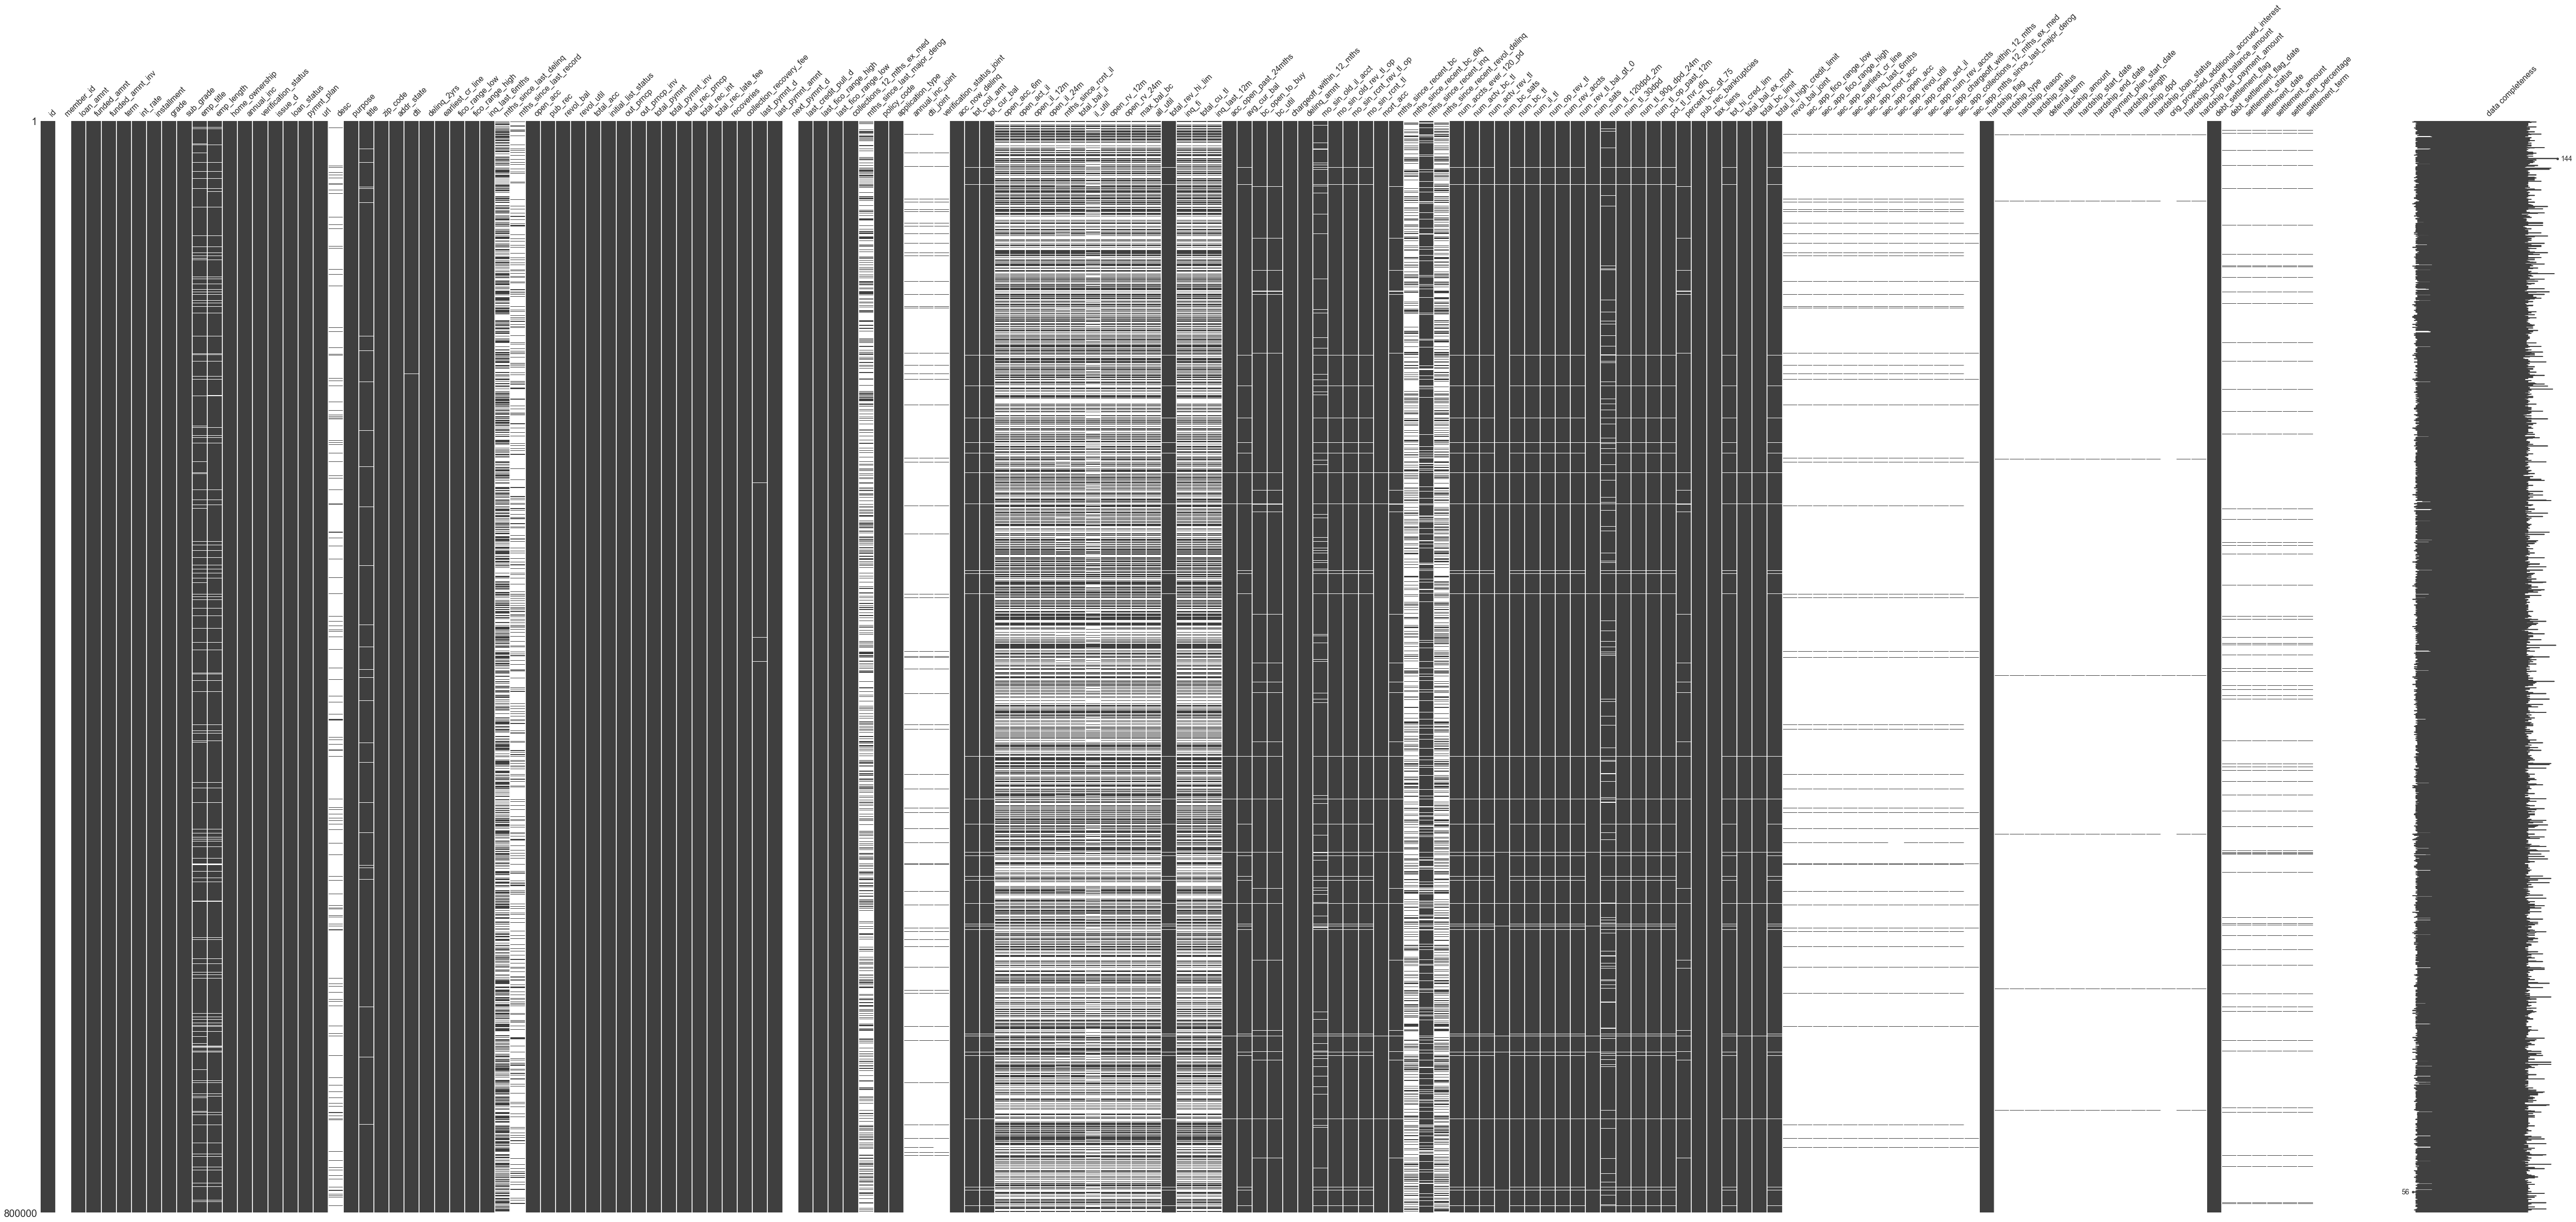

In [8]:
missingno.matrix(a, figsize = (90,40),labels=True)

In [ ]:
df.shape

In [ ]:
df = df[df.loan_status.isin(['Fully Paid','Charged Off'])]
df = df[df.home_ownership.isin(['MORTGAGE','RENT','OWN'])]

# 先把缺失值過高的(loss value>0.4)的特徵移除

In [16]:
mis_feas = [i for i in df.columns if((df[i].isnull().sum())/df.shape[0]) > 0.4]
for fea in mis_feas:
    mis_rate = (df[fea].isnull().sum())/df.shape[0]
df.drop(mis_feas,axis=1,inplace=True)
print(df.shape)

(1610453, 92)


#  剔除貸後資訊

In [32]:
#貸後資訊
ignored_cols = [ 
                'out_prncp',                 # 剩餘未償還本金金額
                'out_prncp_inv',             # 剩餘未償還本金佔總額的比例 
                'total_pymnt',               # 至今收到的已付額
                'total_pymnt_inv',           # 至今收到的款項，佔投資者資助總額的比例
                'total_rec_prncp',           # 至今收到的本金 
                'total_rec_int',             # 至今收到的利息
                'total_rec_late_fee',        # 至今為止收取的延滯金
                'recoveries',                # 過帳總回收費用
                'collection_recovery_fee',   # 郵寄回收費
                'last_pymnt_d',              # 上個月已收到付款
                'last_pymnt_amnt',           # 上一個收到的總付款金額
                'last_credit_pull_d',        # 一個月內最近一筆取消貸款的信貸
                'debt_settlement_flag',      # 標記已清帳的借款人是否正在與債務清算公司合作。
                'zip_code',
                'num_tl_120dpd_2m',
                'sub_grade',
                'grade',
                'acc_now_delinq',
                'tot_coll_amt',
                'delinq_amnt',
                'pct_tl_nvr_dlq',
                'percent_bc_gt_75',
                'tax_liens',
                'tot_coll_amt',
                'hardship_flag',
                'earliest_cr_line'
]
df = df.drop(columns=ignored_cols, axis = 1)

KeyError: "['out_prncp' 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv'\n 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee' 'recoveries'\n 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'\n 'last_credit_pull_d' 'debt_settlement_flag' 'zip_code' 'num_tl_120dpd_2m'\n 'sub_grade' 'grade' 'acc_now_delinq' 'tot_coll_amt' 'delinq_amnt'\n 'pct_tl_nvr_dlq' 'percent_bc_gt_75' 'tax_liens' 'tot_coll_amt'\n 'hardship_flag' 'earliest_cr_line'] not found in axis"

# 剔除不重要變數

In [33]:
df = df.drop(columns=['id','url','policy_code'], axis = 1)

KeyError: "['id' 'url' 'policy_code'] not found in axis"

In [36]:
df.shape

(1610453, 47)

In [28]:
cor = df.corr()

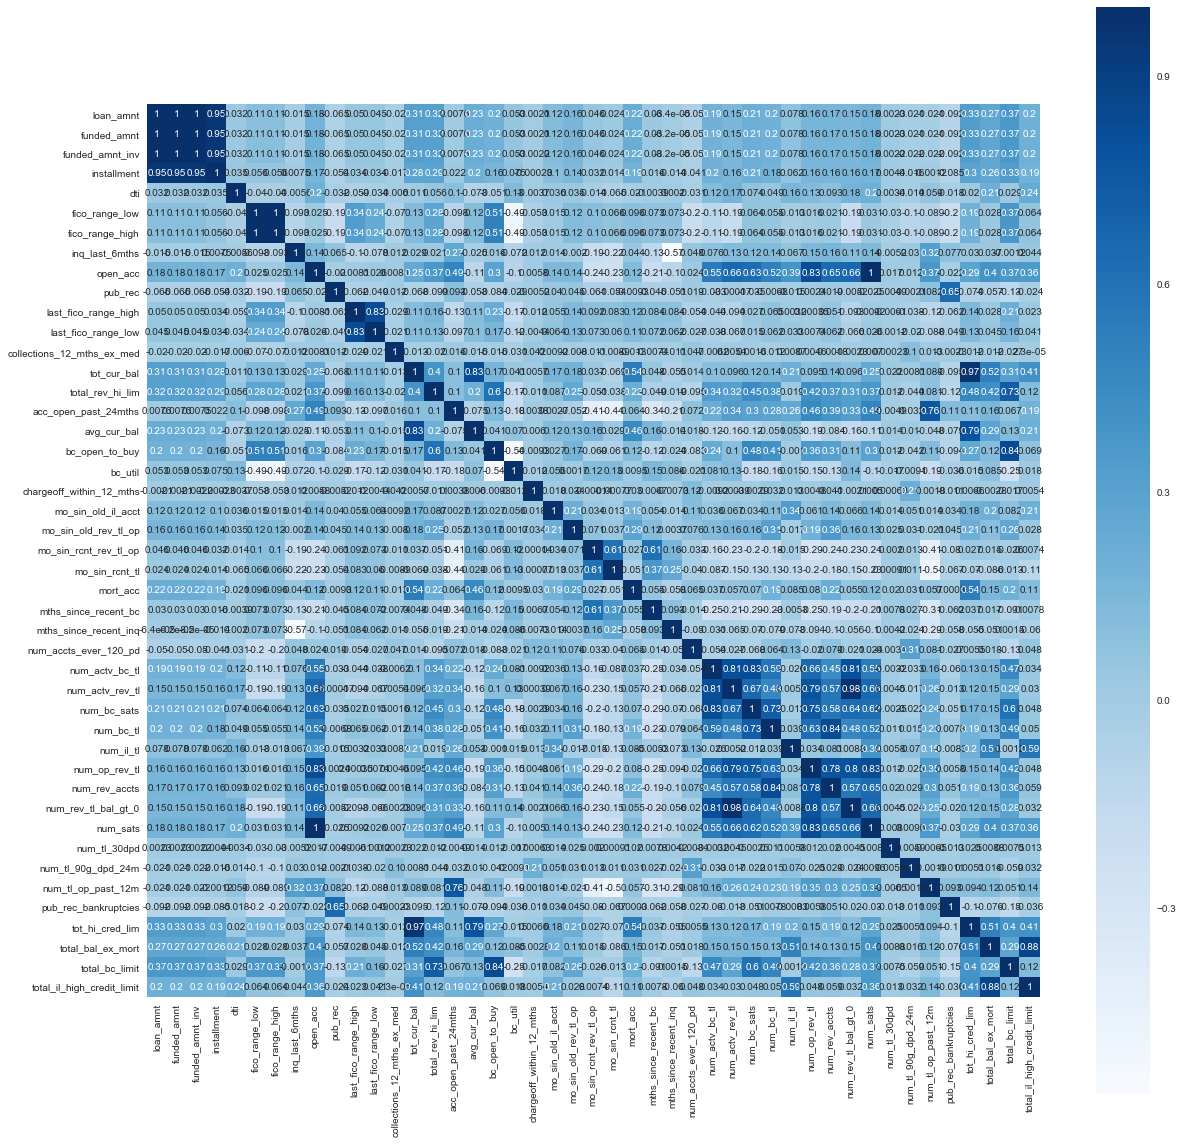

In [30]:
plt.subplots(figsize=(20, 20)) # 設定畫面大小
sns.heatmap(cor, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

In [34]:
#刪除高度相關特徵
df.drop(['funded_amnt','funded_amnt_inv','installment','tot_cur_bal','num_sats','total_il_high_credit_limit'], axis=1, inplace=True)

In [35]:
#刪除LC預設風險特徵或其他不加入模型的特徵,主觀判斷!
df.drop(['emp_title','verification_status','pymnt_plan','title','addr_state','fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low','num_rev_tl_bal_gt_0','collections_12_mths_ex_med'], axis=1, inplace=True)

In [37]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pub_rec_bankruptcies', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object')

In [ ]:
df['term'] = df['term'].str.replace(' months','').astype('float')
df['int_rate'] = (df['int_rate'].str.replace('%','').astype('float'))
df.home_ownership.replace({'MORTGAGE':0,'RENT':1,'OWN':2},inplace=True)
df.purpose.replace({'debt_consolidation':0,'credit_card':1,'home_improvement':2,'other':3,'major_purchase':4,'medical':5,'small_business':6,'car':7,'vacation':8,'moving':9,'house':10,'wedding':11,'renewable_energy':12,'educational':13},inplace=True)
df.loan_status.replace({'Fully Paid':0,'Charged Off':1},inplace=True)
df['annual_inc'] = df['annual_inc'].astype('float')
df.emp_length.replace({'10+ years':10,'2 years':2,'3 years':3,'< 1 year':0,'1 year':1,'5 years':5,'4 years':4,'6 years':6,'9 years':9,'7 years':7,'8 years':8},inplace=True)
df['delinq_2yrs'] = df['delinq_2yrs'].astype('float')
df['revol_bal'] = df['revol_bal'].astype('float')
df['revol_util'] = (df['revol_util'].str.replace('%','').astype('float'))
df['total_acc'] = df['total_acc'].astype('float')
df.initial_list_status.replace({'w':0,'f':1},inplace=True)
df.application_type.replace({'Individual':0,'Joint App':1},inplace=True)
df['T10Y2Y'] = df['T10Y2Y'].astype('float')

In [ ]:
df.shape

In [ ]:
df.columns

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610453 entries, 2 to 187995
Data columns (total 47 columns):
loan_amnt                   1610453 non-null float64
term                        1610453 non-null object
int_rate                    1610453 non-null object
emp_length                  1510371 non-null object
home_ownership              1610453 non-null object
annual_inc                  1610453 non-null object
issue_d                     1610453 non-null object
loan_status                 1610453 non-null object
purpose                     1610453 non-null object
dti                         1609682 non-null float64
delinq_2yrs                 1610453 non-null object
inq_last_6mths              1610452 non-null float64
open_acc                    1610453 non-null float64
pub_rec                     1610453 non-null float64
revol_bal                   1610453 non-null object
revol_util                  1609349 non-null object
total_acc                   1610453 non-null object

In [43]:
Data_Path = 'C:\\Users\justi\OneDrive\桌面\MyFuture\data\\'

newData= pd.read_csv(Data_Path +'Macro.csv')

In [44]:
df['AvgHourEarn']=0
df['BankPrimeLoanRate']=0
df['ConsumerLoanChange']=0
df['CPI_all_Items']=0
df['Per_SavingRate']=0
df['WTISPLC']=0     
df['Michigan']=0
df['Initial_Claims']=0
df['Delinquency_Rate']=0
df['T10Y2Y']=0

In [45]:
Y = ['12','13','14','15','16','17','18','19']
M = ['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']
F = ['AvgHourEarn','BankPrimeLoanRate','ConsumerLoanChange','CPI_all_Items','Per_SavingRate','WTISPLC','Michigan','Initial_Claims','Delinquency_Rate','T10Y2Y']

In [46]:
for i in Y:
    for j in M:
        s = j+i
        for k in F:
            df.loc[df['issue_d'] == s,k]=newData[newData.DATE == s][k].values[0]

KeyboardInterrupt: 

In [ ]:
df.to_csv('0402merge.csv')

In [125]:
mis_feas = [i for i in df.columns if((df[i].isnull().sum())/df.shape[0]) > 0]
for fea in mis_feas:
    mis_rate = (df[fea].isnull().sum())/df.shape[0]
    print(fea,'\t',mis_rate)

In [ ]:
for i in mis_feas:
    df[i] = df[i].fillna(df[i].median())

In [ ]:
missingno.matrix(df, figsize = (80,30),labels=True)

# Do ML

In [2]:
Data_Path = 'C:\\Users\justi\OneDrive\桌面\MyFuture\\'

In [3]:
df= pd.read_csv(Data_Path + '0402merge.csv',index_col=0,encoding='gbk')

In [4]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,...,AvgHourEarn,BankPrimeLoanRate,ConsumerLoanChange,CPI_all_Items,Per_SavingRate,WTISPLC,Michigan,Initial_Claims,Delinquency_Rate,T10Y2Y
2,15000.00000,36.00000,17.97000,5.00000,0,58240.00000,Mar-19,0,0,38.53000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
22,5000.00000,36.00000,20.00000,0.00000,1,42000.00000,Mar-19,0,3,6.46000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
27,3000.00000,36.00000,15.57000,10.00000,1,50000.00000,Mar-19,0,1,17.41000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
30,3025.00000,36.00000,17.19000,3.00000,1,30000.00000,Mar-19,0,0,11.88000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
52,12000.00000,60.00000,12.40000,0.00000,2,89000.00000,Mar-19,0,2,17.00000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143


In [5]:
df.emp_length=df.emp_length.fillna(6)

In [6]:
dff=df.copy()

In [7]:
mis_feas = [i for i in df.columns if((df[i].isnull().sum())/df.shape[0]) > 0]
for fea in mis_feas:
    mis_rate = (df[fea].isnull().sum())/df.shape[0]
    print(fea,'\t',mis_rate)

dti 	 0.00047874728414924245
inq_last_6mths 	 6.20943299804465e-07
revol_util 	 0.0006855214029841293
total_rev_hi_lim 	 0.017212548270579768
acc_open_past_24mths 	 0.004650244372235638
avg_cur_bal 	 0.01723490222937273
bc_open_to_buy 	 0.015622312479780534
bc_util 	 0.016191096542401424
mo_sin_old_il_acct 	 0.04657074748533487
mo_sin_old_rev_tl_op 	 0.017213169213879574
mo_sin_rcnt_rev_tl_op 	 0.017213169213879574
mo_sin_rcnt_tl 	 0.017212548270579768
mort_acc 	 0.004650244372235638
mths_since_recent_bc 	 0.014914437118003443
mths_since_recent_inq 	 0.10421043023298414
num_accts_ever_120_pd 	 0.017212548270579768
num_actv_bc_tl 	 0.017212548270579768
num_actv_rev_tl 	 0.017212548270579768
num_bc_sats 	 0.009961793358763031
num_bc_tl 	 0.017212548270579768
num_il_tl 	 0.017212548270579768
num_op_rev_tl 	 0.017212548270579768
num_rev_accts 	 0.017213169213879574
num_tl_30dpd 	 0.017212548270579768
num_tl_90g_dpd_24m 	 0.017212548270579768
num_tl_op_past_12m 	 0.017212548270579768
tot_hi

In [8]:
# 用中位數補缺失
for i in mis_feas:
    df[i]=df[i].fillna(df[i].median())

In [9]:
#df_0 = df[df.loan_status == 0].sample(n=646830 ,replace=False)
#df_1 = df[df.loan_status == 1]

In [10]:
df

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,...,AvgHourEarn,BankPrimeLoanRate,ConsumerLoanChange,CPI_all_Items,Per_SavingRate,WTISPLC,Michigan,Initial_Claims,Delinquency_Rate,T10Y2Y
2,15000.00000,36.00000,17.97000,5.00000,0,58240.00000,Mar-19,0,0,38.53000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
22,5000.00000,36.00000,20.00000,0.00000,1,42000.00000,Mar-19,0,3,6.46000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
27,3000.00000,36.00000,15.57000,10.00000,1,50000.00000,Mar-19,0,1,17.41000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
30,3025.00000,36.00000,17.19000,3.00000,1,30000.00000,Mar-19,0,0,11.88000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
52,12000.00000,60.00000,12.40000,0.00000,2,89000.00000,Mar-19,0,2,17.00000,...,27.76000,5.50000,5.10000,0.56414,8.40000,58.15000,98.40000,-3.73143,2.58000,0.16143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187991,20500.00000,36.00000,16.77000,7.00000,1,60000.00000,Jan-12,0,0,16.40000,...,23.24000,3.25000,3.30000,0.44002,8.00000,100.24000,75.00000,1.08653,3.06000,1.72600
187992,15000.00000,36.00000,15.27000,3.00000,1,57600.00000,Jan-12,0,6,8.35000,...,23.24000,3.25000,3.30000,0.44002,8.00000,100.24000,75.00000,1.08653,3.06000,1.72600
187993,35000.00000,36.00000,15.96000,3.00000,0,160000.00000,Jan-12,0,6,4.90000,...,23.24000,3.25000,3.30000,0.44002,8.00000,100.24000,75.00000,1.08653,3.06000,1.72600
187994,12000.00000,36.00000,16.29000,6.00000,0,35000.00000,Jan-12,1,3,12.93000,...,23.24000,3.25000,3.30000,0.44002,8.00000,100.24000,75.00000,1.08653,3.06000,1.72600


In [11]:
#df_merge = pd.concat([df_0,df_1],ignore_index=True)

In [12]:
#df_merge

In [13]:
#df_merge=df_merge.drop(['issue_d'],axis=1)
df=df.drop(['issue_d'],axis=1)

In [14]:
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=10)

In [15]:
train_df.loan_status.value_counts()

0    1034320
1     254042
Name: loan_status, dtype: int64

In [16]:
test_df.loan_status.value_counts()

0    259339
1     62752
Name: loan_status, dtype: int64

In [17]:
y_train = train_df['loan_status']
x_train = train_df.drop(['loan_status'],axis=1)
y_test = test_df['loan_status']
x_test = test_df.drop(['loan_status'],axis=1)

In [18]:
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [96]:
#Logistics regression
start_time = time.time()
logreg = linear_model.LogisticRegression(max_iter=10000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc = accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Accuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))

Accuracy:  0.8069427584129951
Running Time: 0:00:52.040091


In [97]:
y_pred_pro = logreg.predict_proba(x_test)

In [98]:
# 從sklearn.metrics里導入classification_report模塊 
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.82      0.98      0.89    259339
  Charge Off       0.53      0.08      0.14     62752

    accuracy                           0.81    322091
   macro avg       0.67      0.53      0.52    322091
weighted avg       0.76      0.81      0.75    322091



混淆矩陣:  [[254750   4589]
 [ 57593   5159]]
Confusion matrix, without normalization
[[254750   4589]
 [ 57593   5159]]


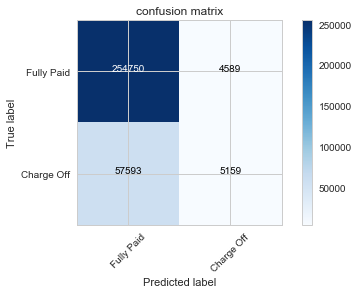

In [99]:
cnf=confusion_matrix(y_test,logreg.predict(x_test))
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [21]:
from sklearn.metrics import roc_curve
plt.rcParams['figure.figsize'] = (10,10)
y = np.array(y_test)

pred = np.array(y_pred_pro[:,1])

fpr, tpr, thresholds = roc_curve(y, pred)

from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

print('AUC of LR Classifier:',auc(fpr, tpr))

plt.title('ROC Curve')

plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([0,1.0])

plt.ylim([0,1.0])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

NameError: name 'y_pred_pro' is not defined

In [40]:
pd.DataFrame(zip(x_train.columns, np.transpose(logreg.coef_)))

,0,1
0,loan_amnt,[1.8201455462399747e-05]
1,term,[0.028687030557505145]
2,int_rate,[0.030372669805971374]
3,emp_length,[-0.0020896845110273724]
4,home_ownership,[0.0004828101682556251]
5,annual_inc,[-1.877886728193723e-06]
6,purpose,[0.001182637402739717]
7,dti,[0.007637103483145186]
8,delinq_2yrs,[0.0008877529335803876]
9,inq_last_6mths,[0.002166096259736845]


In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
#DecisionTreeClassifier
start_time = time.time()
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Acuuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))

Acuuracy:  0.7104700224470724
Running Time: 0:01:55.602027


In [63]:
cnf=confusion_matrix(y_test,y_pred)
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

混淆矩陣:  [[210414  48925]
 [ 44330  18422]]


NameError: name 'plot_confusion_matrix' is not defined

In [22]:
clf.feature_importances_

array([0.03233162, 0.00684255, 0.08269834, 0.0163439 , 0.00558375,
       0.03238125, 0.01060211, 0.04045708, 0.00629279, 0.00813879,
       0.01557867, 0.00448716, 0.02978674, 0.03071399, 0.02202303,
       0.00313628, 0.00116139, 0.02852439, 0.01562678, 0.03797196,
       0.02815745, 0.02769356, 0.00087927, 0.0353318 , 0.03923911,
       0.01902638, 0.017548  , 0.01033349, 0.02644241, 0.02237264,
       0.0076063 , 0.01116628, 0.01395124, 0.01171909, 0.01676753,
       0.01937684, 0.0135353 , 0.01781845, 0.00052433, 0.00263885,
       0.01072456, 0.00306187, 0.03164944, 0.03031255, 0.028509  ,
       0.01642145, 0.00323193, 0.0136994 , 0.01532944, 0.01001049,
       0.01469836, 0.01573278, 0.01689076, 0.00471381, 0.01220326])

In [44]:
feature_importance=pd.DataFrame()
feature_importance['feature'] = train_df.drop(['loan_status'],axis=1).columns
feature_importance['importance']=clf.feature_importances_
feature_importance

,feature,importance
0,loan_amnt,0.03233
1,term,0.00684
2,int_rate,0.08270
3,emp_length,0.01634
4,home_ownership,0.00558
5,annual_inc,0.03238
6,purpose,0.01060
7,dti,0.04046
8,delinq_2yrs,0.00629
9,inq_last_6mths,0.00814


In [45]:
feature_importance.to_csv('clf_im.csv')

In [23]:
clf.tree_.node_count

330227

In [55]:
clf.tree_.feature[35:50]

array([-2, 17, -2, -2, 10, 29, 52,  3, -2, -2, 25, 24, -2, 21, -2],
      dtype=int64)

In [49]:
clf.tree_.threshold[50:100]

array([-2.        , -2.        , -2.        ,  0.96161813, -1.03521007,
       -0.44155795, -2.        , -2.        ,  5.79690337,  3.98298919,
        0.96371639,  1.43231082, -0.15765887, -0.15903961, -0.88396513,
       -1.98922276,  2.12948048,  0.12593103, -1.30694628, -1.31559128,
       -2.        , -2.        ,  0.1129797 , -1.53084564, -1.74363333,
       -2.        , -0.21048059, -2.        , -2.        ,  0.57453202,
       -0.72577477,  1.96128607, -2.        , -1.02462366, -2.        ,
       -2.        , -0.65328874,  0.98084185, -2.        , -0.77532987,
       -2.        , -2.        , -2.        ,  0.96622777, -2.        ,
       -2.        , -0.30043758, -2.        , -2.        , -0.48035158])

In [102]:
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.83      0.81      0.82    259339
  Charge Off       0.27      0.29      0.28     62752

    accuracy                           0.71    322091
   macro avg       0.55      0.55      0.55    322091
weighted avg       0.72      0.71      0.71    322091



In [62]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=train_df.drop(['loan_status'],axis=1).columns, class_names='loan_status', filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [22]:
#RF Classifier
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Accuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))
print("Feature importance: ", clf.feature_importances_)

Accuracy:  0.7997739769195662
Running Time: 0:01:30.985332
Feature importance:  [0.02991433 0.0172881  0.06121089 0.01530147 0.00666662 0.02960285
 0.01064176 0.03523108 0.00634955 0.00817093 0.01816337 0.00485405
 0.02916236 0.02934013 0.0230661  0.00364015 0.00119026 0.02822437
 0.01819265 0.03131778 0.03094282 0.02903698 0.00074506 0.03005952
 0.03186342 0.02048097 0.01864557 0.0104106  0.02430357 0.01996653
 0.00730013 0.01292746 0.0159946  0.01410139 0.01773418 0.02047323
 0.01604597 0.02034888 0.00040066 0.00267495 0.01220972 0.00333045
 0.03192314 0.02917568 0.02879637 0.01700059 0.00632032 0.01539891
 0.01625785 0.01208359 0.01759747 0.01682723 0.01652363 0.00887769
 0.01569209]


混淆矩陣:  [[251343   7996]
 [ 56495   6257]]
Confusion matrix, without normalization
[[251343   7996]
 [ 56495   6257]]


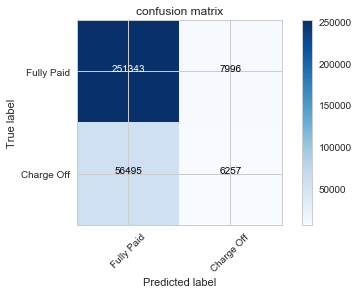

In [23]:
cnf=confusion_matrix(y_test,y_pred)
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [40]:
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.82      0.97      0.89    259339
  Charge Off       0.43      0.10      0.16     62752

    accuracy                           0.80    322091
   macro avg       0.62      0.53      0.52    322091
weighted avg       0.74      0.80      0.74    322091



In [24]:
#GradientBoostingClassifier
start_time = time.time()
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Acuuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))

Acuuracy:  0.8089701357690839
Running Time: 0:17:01.601015


混淆矩陣:  [[256221   3118]
 [ 58411   4341]]
Confusion matrix, without normalization
[[256221   3118]
 [ 58411   4341]]


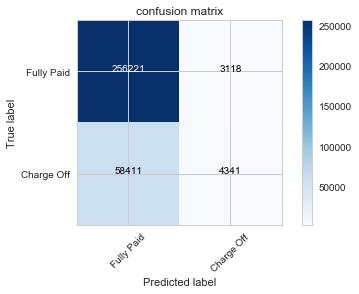

In [25]:
cnf=confusion_matrix(y_test,y_pred)
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [42]:
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.81      0.99      0.89    259339
  Charge Off       0.58      0.07      0.12     62752

    accuracy                           0.81    322091
   macro avg       0.70      0.53      0.51    322091
weighted avg       0.77      0.81      0.74    322091



In [26]:
#AdaBoostClassifier
start_time = time.time()
SGD = AdaBoostClassifier(n_estimators=100)
SGD.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Acuuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))

Acuuracy:  0.8089701357690839
Running Time: 0:14:50.570074


混淆矩陣:  [[256221   3118]
 [ 58411   4341]]
Confusion matrix, without normalization
[[256221   3118]
 [ 58411   4341]]


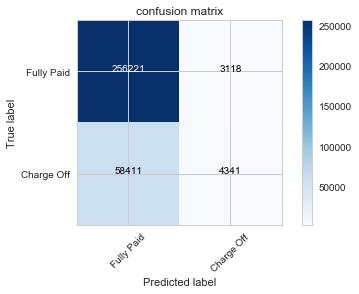

In [27]:
cnf=confusion_matrix(y_test,y_pred)
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [44]:
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.81      0.99      0.89    259339
  Charge Off       0.58      0.07      0.12     62752

    accuracy                           0.81    322091
   macro avg       0.70      0.53      0.51    322091
weighted avg       0.77      0.81      0.74    322091



In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
#XBG
start_time = time.time()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Acuuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))

Acuuracy:  0.8086782927806117
Running Time: 0:11:16.170252


混淆矩陣:  [[256730   2609]
 [ 59014   3738]]
Confusion matrix, without normalization
[[256730   2609]
 [ 59014   3738]]


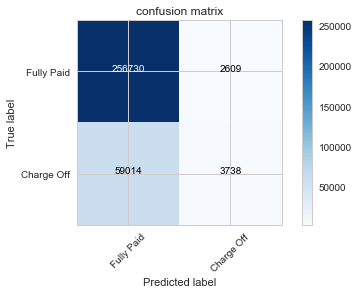

In [29]:
cnf=confusion_matrix(y_test,y_pred)
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [46]:
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.81      0.99      0.89    259339
  Charge Off       0.59      0.06      0.11     62752

    accuracy                           0.81    322091
   macro avg       0.70      0.52      0.50    322091
weighted avg       0.77      0.81      0.74    322091



In [68]:
import catboost as cb
start_time = time.time()
model = cb.CatBoostClassifier(n_estimators=10000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
preds_probs = model.predict_proba(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Acuuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))

Learning rate set to 0.026541
0:	learn: 0.6790814	total: 209ms	remaining: 34m 45s
1:	learn: 0.6656961	total: 432ms	remaining: 35m 58s
2:	learn: 0.6533753	total: 645ms	remaining: 35m 50s
3:	learn: 0.6416028	total: 881ms	remaining: 36m 41s
4:	learn: 0.6306544	total: 1.14s	remaining: 37m 51s
5:	learn: 0.6200754	total: 1.43s	remaining: 39m 46s
6:	learn: 0.6101610	total: 1.72s	remaining: 40m 56s
7:	learn: 0.6010859	total: 1.99s	remaining: 41m 24s
8:	learn: 0.5923395	total: 2.26s	remaining: 41m 45s
9:	learn: 0.5841188	total: 2.51s	remaining: 41m 47s
10:	learn: 0.5763993	total: 2.74s	remaining: 41m 28s
11:	learn: 0.5692737	total: 2.98s	remaining: 41m 19s
12:	learn: 0.5626369	total: 3.22s	remaining: 41m 10s
13:	learn: 0.5563736	total: 3.46s	remaining: 41m 8s
14:	learn: 0.5505847	total: 3.7s	remaining: 41m 6s
15:	learn: 0.5450639	total: 3.93s	remaining: 40m 50s
16:	learn: 0.5401022	total: 4.18s	remaining: 40m 52s
17:	learn: 0.5350852	total: 4.4s	remaining: 40m 41s
18:	learn: 0.5306140	total: 4.

155:	learn: 0.4470094	total: 37.3s	remaining: 39m 12s
156:	learn: 0.4469698	total: 37.5s	remaining: 39m 12s
157:	learn: 0.4469197	total: 37.7s	remaining: 39m 10s
158:	learn: 0.4468860	total: 38s	remaining: 39m 9s
159:	learn: 0.4468512	total: 38.2s	remaining: 39m 7s
160:	learn: 0.4468183	total: 38.4s	remaining: 39m 5s
161:	learn: 0.4467757	total: 38.6s	remaining: 39m 5s
162:	learn: 0.4467406	total: 38.8s	remaining: 39m 3s
163:	learn: 0.4467000	total: 39.1s	remaining: 39m 3s
164:	learn: 0.4466684	total: 39.3s	remaining: 39m 2s
165:	learn: 0.4466292	total: 39.5s	remaining: 39m
166:	learn: 0.4465852	total: 39.7s	remaining: 39m
167:	learn: 0.4465496	total: 40s	remaining: 38m 58s
168:	learn: 0.4465144	total: 40.2s	remaining: 38m 57s
169:	learn: 0.4464820	total: 40.4s	remaining: 38m 55s
170:	learn: 0.4464434	total: 40.6s	remaining: 38m 54s
171:	learn: 0.4464140	total: 40.8s	remaining: 38m 54s
172:	learn: 0.4463808	total: 41.1s	remaining: 38m 52s
173:	learn: 0.4463464	total: 41.3s	remaining: 3

308:	learn: 0.4436396	total: 1m 11s	remaining: 37m 11s
309:	learn: 0.4436288	total: 1m 11s	remaining: 37m 11s
310:	learn: 0.4436173	total: 1m 11s	remaining: 37m 10s
311:	learn: 0.4436040	total: 1m 11s	remaining: 37m 9s
312:	learn: 0.4435909	total: 1m 12s	remaining: 37m 8s
313:	learn: 0.4435739	total: 1m 12s	remaining: 37m 8s
314:	learn: 0.4435600	total: 1m 12s	remaining: 37m 8s
315:	learn: 0.4435496	total: 1m 12s	remaining: 37m 7s
316:	learn: 0.4435390	total: 1m 12s	remaining: 37m 6s
317:	learn: 0.4435278	total: 1m 13s	remaining: 37m 6s
318:	learn: 0.4435148	total: 1m 13s	remaining: 37m 5s
319:	learn: 0.4435004	total: 1m 13s	remaining: 37m 5s
320:	learn: 0.4434880	total: 1m 13s	remaining: 37m 5s
321:	learn: 0.4434748	total: 1m 14s	remaining: 37m 4s
322:	learn: 0.4434638	total: 1m 14s	remaining: 37m 4s
323:	learn: 0.4434511	total: 1m 14s	remaining: 37m 3s
324:	learn: 0.4434375	total: 1m 14s	remaining: 37m 3s
325:	learn: 0.4434273	total: 1m 14s	remaining: 37m 2s
326:	learn: 0.4434099	tot

458:	learn: 0.4420653	total: 1m 45s	remaining: 36m 25s
459:	learn: 0.4420572	total: 1m 45s	remaining: 36m 24s
460:	learn: 0.4420474	total: 1m 45s	remaining: 36m 24s
461:	learn: 0.4420374	total: 1m 45s	remaining: 36m 23s
462:	learn: 0.4420285	total: 1m 46s	remaining: 36m 24s
463:	learn: 0.4420209	total: 1m 46s	remaining: 36m 23s
464:	learn: 0.4420135	total: 1m 46s	remaining: 36m 23s
465:	learn: 0.4420045	total: 1m 46s	remaining: 36m 23s
466:	learn: 0.4419964	total: 1m 46s	remaining: 36m 22s
467:	learn: 0.4419863	total: 1m 47s	remaining: 36m 22s
468:	learn: 0.4419808	total: 1m 47s	remaining: 36m 22s
469:	learn: 0.4419701	total: 1m 47s	remaining: 36m 21s
470:	learn: 0.4419614	total: 1m 47s	remaining: 36m 21s
471:	learn: 0.4419498	total: 1m 48s	remaining: 36m 20s
472:	learn: 0.4419435	total: 1m 48s	remaining: 36m 20s
473:	learn: 0.4419352	total: 1m 48s	remaining: 36m 19s
474:	learn: 0.4419287	total: 1m 48s	remaining: 36m 18s
475:	learn: 0.4419207	total: 1m 48s	remaining: 36m 18s
476:	learn

609:	learn: 0.4408659	total: 2m 19s	remaining: 35m 40s
610:	learn: 0.4408580	total: 2m 19s	remaining: 35m 39s
611:	learn: 0.4408511	total: 2m 19s	remaining: 35m 39s
612:	learn: 0.4408430	total: 2m 19s	remaining: 35m 39s
613:	learn: 0.4408348	total: 2m 19s	remaining: 35m 38s
614:	learn: 0.4408287	total: 2m 20s	remaining: 35m 38s
615:	learn: 0.4408227	total: 2m 20s	remaining: 35m 37s
616:	learn: 0.4408161	total: 2m 20s	remaining: 35m 37s
617:	learn: 0.4408087	total: 2m 20s	remaining: 35m 37s
618:	learn: 0.4408004	total: 2m 20s	remaining: 35m 36s
619:	learn: 0.4407929	total: 2m 21s	remaining: 35m 36s
620:	learn: 0.4407851	total: 2m 21s	remaining: 35m 36s
621:	learn: 0.4407776	total: 2m 21s	remaining: 35m 35s
622:	learn: 0.4407702	total: 2m 21s	remaining: 35m 35s
623:	learn: 0.4407625	total: 2m 22s	remaining: 35m 35s
624:	learn: 0.4407549	total: 2m 22s	remaining: 35m 34s
625:	learn: 0.4407472	total: 2m 22s	remaining: 35m 34s
626:	learn: 0.4407410	total: 2m 22s	remaining: 35m 33s
627:	learn

759:	learn: 0.4398813	total: 2m 52s	remaining: 35m 1s
760:	learn: 0.4398751	total: 2m 53s	remaining: 35m 1s
761:	learn: 0.4398692	total: 2m 53s	remaining: 35m 1s
762:	learn: 0.4398631	total: 2m 53s	remaining: 35m 1s
763:	learn: 0.4398570	total: 2m 53s	remaining: 35m
764:	learn: 0.4398497	total: 2m 54s	remaining: 35m
765:	learn: 0.4398437	total: 2m 54s	remaining: 35m
766:	learn: 0.4398371	total: 2m 54s	remaining: 35m
767:	learn: 0.4398327	total: 2m 54s	remaining: 34m 59s
768:	learn: 0.4398259	total: 2m 54s	remaining: 35m
769:	learn: 0.4398195	total: 2m 55s	remaining: 35m
770:	learn: 0.4398135	total: 2m 55s	remaining: 35m
771:	learn: 0.4398069	total: 2m 55s	remaining: 35m
772:	learn: 0.4398019	total: 2m 55s	remaining: 35m
773:	learn: 0.4397957	total: 2m 56s	remaining: 35m
774:	learn: 0.4397902	total: 2m 56s	remaining: 35m
775:	learn: 0.4397844	total: 2m 56s	remaining: 35m
776:	learn: 0.4397798	total: 2m 56s	remaining: 34m 59s
777:	learn: 0.4397744	total: 2m 57s	remaining: 34m 59s
778:	le

910:	learn: 0.4390664	total: 3m 27s	remaining: 34m 28s
911:	learn: 0.4390598	total: 3m 27s	remaining: 34m 28s
912:	learn: 0.4390550	total: 3m 27s	remaining: 34m 28s
913:	learn: 0.4390510	total: 3m 28s	remaining: 34m 28s
914:	learn: 0.4390469	total: 3m 28s	remaining: 34m 28s
915:	learn: 0.4390418	total: 3m 28s	remaining: 34m 28s
916:	learn: 0.4390378	total: 3m 28s	remaining: 34m 28s
917:	learn: 0.4390342	total: 3m 29s	remaining: 34m 28s
918:	learn: 0.4390283	total: 3m 29s	remaining: 34m 27s
919:	learn: 0.4390228	total: 3m 29s	remaining: 34m 27s
920:	learn: 0.4390178	total: 3m 29s	remaining: 34m 27s
921:	learn: 0.4390124	total: 3m 29s	remaining: 34m 27s
922:	learn: 0.4390073	total: 3m 30s	remaining: 34m 27s
923:	learn: 0.4390018	total: 3m 30s	remaining: 34m 26s
924:	learn: 0.4389971	total: 3m 30s	remaining: 34m 26s
925:	learn: 0.4389912	total: 3m 30s	remaining: 34m 26s
926:	learn: 0.4389863	total: 3m 31s	remaining: 34m 26s
927:	learn: 0.4389822	total: 3m 31s	remaining: 34m 25s
928:	learn

1060:	learn: 0.4383627	total: 4m 1s	remaining: 33m 55s
1061:	learn: 0.4383578	total: 4m 1s	remaining: 33m 55s
1062:	learn: 0.4383536	total: 4m 2s	remaining: 33m 55s
1063:	learn: 0.4383502	total: 4m 2s	remaining: 33m 55s
1064:	learn: 0.4383452	total: 4m 2s	remaining: 33m 54s
1065:	learn: 0.4383397	total: 4m 2s	remaining: 33m 54s
1066:	learn: 0.4383357	total: 4m 2s	remaining: 33m 54s
1067:	learn: 0.4383313	total: 4m 3s	remaining: 33m 54s
1068:	learn: 0.4383267	total: 4m 3s	remaining: 33m 53s
1069:	learn: 0.4383215	total: 4m 3s	remaining: 33m 53s
1070:	learn: 0.4383177	total: 4m 3s	remaining: 33m 53s
1071:	learn: 0.4383137	total: 4m 4s	remaining: 33m 53s
1072:	learn: 0.4383089	total: 4m 4s	remaining: 33m 53s
1073:	learn: 0.4383048	total: 4m 4s	remaining: 33m 52s
1074:	learn: 0.4383006	total: 4m 4s	remaining: 33m 52s
1075:	learn: 0.4382964	total: 4m 5s	remaining: 33m 52s
1076:	learn: 0.4382913	total: 4m 5s	remaining: 33m 52s
1077:	learn: 0.4382872	total: 4m 5s	remaining: 33m 51s
1078:	lear

1207:	learn: 0.4377235	total: 4m 35s	remaining: 33m 24s
1208:	learn: 0.4377193	total: 4m 35s	remaining: 33m 24s
1209:	learn: 0.4377153	total: 4m 35s	remaining: 33m 24s
1210:	learn: 0.4377119	total: 4m 36s	remaining: 33m 23s
1211:	learn: 0.4377074	total: 4m 36s	remaining: 33m 23s
1212:	learn: 0.4377028	total: 4m 36s	remaining: 33m 23s
1213:	learn: 0.4376991	total: 4m 36s	remaining: 33m 23s
1214:	learn: 0.4376962	total: 4m 37s	remaining: 33m 22s
1215:	learn: 0.4376927	total: 4m 37s	remaining: 33m 22s
1216:	learn: 0.4376888	total: 4m 37s	remaining: 33m 22s
1217:	learn: 0.4376822	total: 4m 37s	remaining: 33m 22s
1218:	learn: 0.4376781	total: 4m 37s	remaining: 33m 21s
1219:	learn: 0.4376743	total: 4m 38s	remaining: 33m 21s
1220:	learn: 0.4376698	total: 4m 38s	remaining: 33m 21s
1221:	learn: 0.4376648	total: 4m 38s	remaining: 33m 21s
1222:	learn: 0.4376606	total: 4m 38s	remaining: 33m 20s
1223:	learn: 0.4376542	total: 4m 39s	remaining: 33m 20s
1224:	learn: 0.4376504	total: 4m 39s	remaining: 

1356:	learn: 0.4371503	total: 5m 9s	remaining: 32m 50s
1357:	learn: 0.4371471	total: 5m 9s	remaining: 32m 50s
1358:	learn: 0.4371436	total: 5m 9s	remaining: 32m 50s
1359:	learn: 0.4371412	total: 5m 10s	remaining: 32m 49s
1360:	learn: 0.4371369	total: 5m 10s	remaining: 32m 49s
1361:	learn: 0.4371334	total: 5m 10s	remaining: 32m 49s
1362:	learn: 0.4371301	total: 5m 10s	remaining: 32m 48s
1363:	learn: 0.4371257	total: 5m 10s	remaining: 32m 48s
1364:	learn: 0.4371215	total: 5m 11s	remaining: 32m 48s
1365:	learn: 0.4371182	total: 5m 11s	remaining: 32m 48s
1366:	learn: 0.4371144	total: 5m 11s	remaining: 32m 47s
1367:	learn: 0.4371112	total: 5m 11s	remaining: 32m 47s
1368:	learn: 0.4371080	total: 5m 12s	remaining: 32m 47s
1369:	learn: 0.4371035	total: 5m 12s	remaining: 32m 47s
1370:	learn: 0.4371003	total: 5m 12s	remaining: 32m 47s
1371:	learn: 0.4370967	total: 5m 12s	remaining: 32m 47s
1372:	learn: 0.4370930	total: 5m 13s	remaining: 32m 47s
1373:	learn: 0.4370895	total: 5m 13s	remaining: 32m

1503:	learn: 0.4366300	total: 5m 42s	remaining: 32m 16s
1504:	learn: 0.4366260	total: 5m 43s	remaining: 32m 16s
1505:	learn: 0.4366222	total: 5m 43s	remaining: 32m 16s
1506:	learn: 0.4366194	total: 5m 43s	remaining: 32m 15s
1507:	learn: 0.4366158	total: 5m 43s	remaining: 32m 15s
1508:	learn: 0.4366120	total: 5m 43s	remaining: 32m 15s
1509:	learn: 0.4366089	total: 5m 44s	remaining: 32m 15s
1510:	learn: 0.4366060	total: 5m 44s	remaining: 32m 15s
1511:	learn: 0.4366023	total: 5m 44s	remaining: 32m 14s
1512:	learn: 0.4365988	total: 5m 44s	remaining: 32m 14s
1513:	learn: 0.4365953	total: 5m 45s	remaining: 32m 14s
1514:	learn: 0.4365928	total: 5m 45s	remaining: 32m 13s
1515:	learn: 0.4365878	total: 5m 45s	remaining: 32m 13s
1516:	learn: 0.4365853	total: 5m 45s	remaining: 32m 13s
1517:	learn: 0.4365824	total: 5m 45s	remaining: 32m 13s
1518:	learn: 0.4365791	total: 5m 46s	remaining: 32m 12s
1519:	learn: 0.4365758	total: 5m 46s	remaining: 32m 12s
1520:	learn: 0.4365731	total: 5m 46s	remaining: 

1652:	learn: 0.4361224	total: 6m 16s	remaining: 31m 41s
1653:	learn: 0.4361183	total: 6m 16s	remaining: 31m 40s
1654:	learn: 0.4361141	total: 6m 16s	remaining: 31m 40s
1655:	learn: 0.4361107	total: 6m 17s	remaining: 31m 40s
1656:	learn: 0.4361071	total: 6m 17s	remaining: 31m 40s
1657:	learn: 0.4361028	total: 6m 17s	remaining: 31m 39s
1658:	learn: 0.4360993	total: 6m 17s	remaining: 31m 39s
1659:	learn: 0.4360957	total: 6m 18s	remaining: 31m 39s
1660:	learn: 0.4360922	total: 6m 18s	remaining: 31m 39s
1661:	learn: 0.4360878	total: 6m 18s	remaining: 31m 38s
1662:	learn: 0.4360835	total: 6m 18s	remaining: 31m 38s
1663:	learn: 0.4360801	total: 6m 18s	remaining: 31m 38s
1664:	learn: 0.4360767	total: 6m 19s	remaining: 31m 38s
1665:	learn: 0.4360734	total: 6m 19s	remaining: 31m 37s
1666:	learn: 0.4360713	total: 6m 19s	remaining: 31m 37s
1667:	learn: 0.4360677	total: 6m 19s	remaining: 31m 37s
1668:	learn: 0.4360636	total: 6m 20s	remaining: 31m 37s
1669:	learn: 0.4360610	total: 6m 20s	remaining: 

1799:	learn: 0.4356491	total: 6m 49s	remaining: 31m 6s
1800:	learn: 0.4356464	total: 6m 49s	remaining: 31m 5s
1801:	learn: 0.4356425	total: 6m 50s	remaining: 31m 5s
1802:	learn: 0.4356399	total: 6m 50s	remaining: 31m 5s
1803:	learn: 0.4356367	total: 6m 50s	remaining: 31m 5s
1804:	learn: 0.4356333	total: 6m 50s	remaining: 31m 4s
1805:	learn: 0.4356300	total: 6m 50s	remaining: 31m 4s
1806:	learn: 0.4356272	total: 6m 51s	remaining: 31m 4s
1807:	learn: 0.4356231	total: 6m 51s	remaining: 31m 3s
1808:	learn: 0.4356206	total: 6m 51s	remaining: 31m 3s
1809:	learn: 0.4356173	total: 6m 51s	remaining: 31m 3s
1810:	learn: 0.4356131	total: 6m 52s	remaining: 31m 3s
1811:	learn: 0.4356105	total: 6m 52s	remaining: 31m 2s
1812:	learn: 0.4356062	total: 6m 52s	remaining: 31m 2s
1813:	learn: 0.4356036	total: 6m 52s	remaining: 31m 2s
1814:	learn: 0.4356006	total: 6m 52s	remaining: 31m 2s
1815:	learn: 0.4355981	total: 6m 53s	remaining: 31m 1s
1816:	learn: 0.4355947	total: 6m 53s	remaining: 31m 1s
1817:	lear

1948:	learn: 0.4352231	total: 7m 23s	remaining: 30m 30s
1949:	learn: 0.4352207	total: 7m 23s	remaining: 30m 29s
1950:	learn: 0.4352190	total: 7m 23s	remaining: 30m 29s
1951:	learn: 0.4352149	total: 7m 23s	remaining: 30m 29s
1952:	learn: 0.4352116	total: 7m 23s	remaining: 30m 29s
1953:	learn: 0.4352088	total: 7m 24s	remaining: 30m 29s
1954:	learn: 0.4352066	total: 7m 24s	remaining: 30m 29s
1955:	learn: 0.4352027	total: 7m 24s	remaining: 30m 28s
1956:	learn: 0.4351997	total: 7m 24s	remaining: 30m 28s
1957:	learn: 0.4351974	total: 7m 25s	remaining: 30m 28s
1958:	learn: 0.4351945	total: 7m 25s	remaining: 30m 28s
1959:	learn: 0.4351921	total: 7m 25s	remaining: 30m 28s
1960:	learn: 0.4351894	total: 7m 25s	remaining: 30m 28s
1961:	learn: 0.4351871	total: 7m 26s	remaining: 30m 27s
1962:	learn: 0.4351838	total: 7m 26s	remaining: 30m 27s
1963:	learn: 0.4351803	total: 7m 26s	remaining: 30m 27s
1964:	learn: 0.4351781	total: 7m 26s	remaining: 30m 27s
1965:	learn: 0.4351749	total: 7m 27s	remaining: 

2096:	learn: 0.4348099	total: 7m 56s	remaining: 29m 57s
2097:	learn: 0.4348067	total: 7m 57s	remaining: 29m 56s
2098:	learn: 0.4348038	total: 7m 57s	remaining: 29m 56s
2099:	learn: 0.4348014	total: 7m 57s	remaining: 29m 56s
2100:	learn: 0.4347989	total: 7m 57s	remaining: 29m 56s
2101:	learn: 0.4347962	total: 7m 57s	remaining: 29m 55s
2102:	learn: 0.4347936	total: 7m 58s	remaining: 29m 55s
2103:	learn: 0.4347913	total: 7m 58s	remaining: 29m 55s
2104:	learn: 0.4347888	total: 7m 58s	remaining: 29m 55s
2105:	learn: 0.4347851	total: 7m 58s	remaining: 29m 54s
2106:	learn: 0.4347821	total: 7m 59s	remaining: 29m 54s
2107:	learn: 0.4347798	total: 7m 59s	remaining: 29m 54s
2108:	learn: 0.4347755	total: 7m 59s	remaining: 29m 54s
2109:	learn: 0.4347728	total: 7m 59s	remaining: 29m 53s
2110:	learn: 0.4347706	total: 7m 59s	remaining: 29m 53s
2111:	learn: 0.4347668	total: 8m	remaining: 29m 53s
2112:	learn: 0.4347643	total: 8m	remaining: 29m 53s
2113:	learn: 0.4347609	total: 8m	remaining: 29m 52s
2114

2244:	learn: 0.4343881	total: 8m 30s	remaining: 29m 22s
2245:	learn: 0.4343853	total: 8m 30s	remaining: 29m 21s
2246:	learn: 0.4343836	total: 8m 30s	remaining: 29m 21s
2247:	learn: 0.4343795	total: 8m 30s	remaining: 29m 21s
2248:	learn: 0.4343765	total: 8m 31s	remaining: 29m 21s
2249:	learn: 0.4343739	total: 8m 31s	remaining: 29m 21s
2250:	learn: 0.4343703	total: 8m 31s	remaining: 29m 20s
2251:	learn: 0.4343677	total: 8m 31s	remaining: 29m 20s
2252:	learn: 0.4343646	total: 8m 31s	remaining: 29m 20s
2253:	learn: 0.4343609	total: 8m 32s	remaining: 29m 20s
2254:	learn: 0.4343582	total: 8m 32s	remaining: 29m 19s
2255:	learn: 0.4343542	total: 8m 32s	remaining: 29m 19s
2256:	learn: 0.4343512	total: 8m 32s	remaining: 29m 19s
2257:	learn: 0.4343496	total: 8m 33s	remaining: 29m 18s
2258:	learn: 0.4343469	total: 8m 33s	remaining: 29m 18s
2259:	learn: 0.4343441	total: 8m 33s	remaining: 29m 18s
2260:	learn: 0.4343411	total: 8m 33s	remaining: 29m 18s
2261:	learn: 0.4343384	total: 8m 33s	remaining: 

2392:	learn: 0.4339856	total: 9m 3s	remaining: 28m 48s
2393:	learn: 0.4339823	total: 9m 3s	remaining: 28m 48s
2394:	learn: 0.4339798	total: 9m 4s	remaining: 28m 47s
2395:	learn: 0.4339773	total: 9m 4s	remaining: 28m 47s
2396:	learn: 0.4339747	total: 9m 4s	remaining: 28m 47s
2397:	learn: 0.4339716	total: 9m 4s	remaining: 28m 46s
2398:	learn: 0.4339698	total: 9m 4s	remaining: 28m 46s
2399:	learn: 0.4339674	total: 9m 5s	remaining: 28m 46s
2400:	learn: 0.4339649	total: 9m 5s	remaining: 28m 46s
2401:	learn: 0.4339617	total: 9m 5s	remaining: 28m 45s
2402:	learn: 0.4339595	total: 9m 5s	remaining: 28m 45s
2403:	learn: 0.4339572	total: 9m 6s	remaining: 28m 45s
2404:	learn: 0.4339540	total: 9m 6s	remaining: 28m 45s
2405:	learn: 0.4339521	total: 9m 6s	remaining: 28m 45s
2406:	learn: 0.4339499	total: 9m 6s	remaining: 28m 44s
2407:	learn: 0.4339472	total: 9m 6s	remaining: 28m 44s
2408:	learn: 0.4339453	total: 9m 7s	remaining: 28m 44s
2409:	learn: 0.4339422	total: 9m 7s	remaining: 28m 44s
2410:	lear

2539:	learn: 0.4336063	total: 9m 37s	remaining: 28m 14s
2540:	learn: 0.4336032	total: 9m 37s	remaining: 28m 14s
2541:	learn: 0.4336007	total: 9m 37s	remaining: 28m 14s
2542:	learn: 0.4335983	total: 9m 37s	remaining: 28m 14s
2543:	learn: 0.4335951	total: 9m 37s	remaining: 28m 13s
2544:	learn: 0.4335924	total: 9m 38s	remaining: 28m 13s
2545:	learn: 0.4335894	total: 9m 38s	remaining: 28m 13s
2546:	learn: 0.4335873	total: 9m 38s	remaining: 28m 13s
2547:	learn: 0.4335855	total: 9m 38s	remaining: 28m 13s
2548:	learn: 0.4335837	total: 9m 39s	remaining: 28m 12s
2549:	learn: 0.4335814	total: 9m 39s	remaining: 28m 12s
2550:	learn: 0.4335788	total: 9m 39s	remaining: 28m 12s
2551:	learn: 0.4335752	total: 9m 39s	remaining: 28m 12s
2552:	learn: 0.4335712	total: 9m 40s	remaining: 28m 11s
2553:	learn: 0.4335686	total: 9m 40s	remaining: 28m 11s
2554:	learn: 0.4335659	total: 9m 40s	remaining: 28m 11s
2555:	learn: 0.4335634	total: 9m 40s	remaining: 28m 11s
2556:	learn: 0.4335611	total: 9m 40s	remaining: 

2687:	learn: 0.4332289	total: 10m 10s	remaining: 27m 40s
2688:	learn: 0.4332282	total: 10m 10s	remaining: 27m 40s
2689:	learn: 0.4332246	total: 10m 10s	remaining: 27m 40s
2690:	learn: 0.4332228	total: 10m 11s	remaining: 27m 39s
2691:	learn: 0.4332198	total: 10m 11s	remaining: 27m 39s
2692:	learn: 0.4332172	total: 10m 11s	remaining: 27m 39s
2693:	learn: 0.4332142	total: 10m 11s	remaining: 27m 39s
2694:	learn: 0.4332118	total: 10m 12s	remaining: 27m 39s
2695:	learn: 0.4332093	total: 10m 12s	remaining: 27m 38s
2696:	learn: 0.4332067	total: 10m 12s	remaining: 27m 38s
2697:	learn: 0.4332042	total: 10m 12s	remaining: 27m 38s
2698:	learn: 0.4332011	total: 10m 12s	remaining: 27m 38s
2699:	learn: 0.4331982	total: 10m 13s	remaining: 27m 37s
2700:	learn: 0.4331956	total: 10m 13s	remaining: 27m 37s
2701:	learn: 0.4331921	total: 10m 13s	remaining: 27m 37s
2702:	learn: 0.4331896	total: 10m 13s	remaining: 27m 37s
2703:	learn: 0.4331877	total: 10m 14s	remaining: 27m 36s
2704:	learn: 0.4331853	total: 1

2831:	learn: 0.4328666	total: 10m 42s	remaining: 27m 7s
2832:	learn: 0.4328642	total: 10m 43s	remaining: 27m 7s
2833:	learn: 0.4328623	total: 10m 43s	remaining: 27m 6s
2834:	learn: 0.4328600	total: 10m 43s	remaining: 27m 6s
2835:	learn: 0.4328576	total: 10m 43s	remaining: 27m 6s
2836:	learn: 0.4328551	total: 10m 44s	remaining: 27m 6s
2837:	learn: 0.4328528	total: 10m 44s	remaining: 27m 6s
2838:	learn: 0.4328501	total: 10m 44s	remaining: 27m 6s
2839:	learn: 0.4328474	total: 10m 44s	remaining: 27m 5s
2840:	learn: 0.4328444	total: 10m 45s	remaining: 27m 5s
2841:	learn: 0.4328424	total: 10m 45s	remaining: 27m 5s
2842:	learn: 0.4328389	total: 10m 45s	remaining: 27m 5s
2843:	learn: 0.4328362	total: 10m 45s	remaining: 27m 4s
2844:	learn: 0.4328344	total: 10m 46s	remaining: 27m 4s
2845:	learn: 0.4328317	total: 10m 46s	remaining: 27m 4s
2846:	learn: 0.4328293	total: 10m 46s	remaining: 27m 4s
2847:	learn: 0.4328276	total: 10m 46s	remaining: 27m 3s
2848:	learn: 0.4328254	total: 10m 46s	remaining:

2977:	learn: 0.4325052	total: 11m 15s	remaining: 26m 33s
2978:	learn: 0.4325024	total: 11m 16s	remaining: 26m 33s
2979:	learn: 0.4324992	total: 11m 16s	remaining: 26m 33s
2980:	learn: 0.4324970	total: 11m 16s	remaining: 26m 33s
2981:	learn: 0.4324951	total: 11m 16s	remaining: 26m 32s
2982:	learn: 0.4324936	total: 11m 16s	remaining: 26m 32s
2983:	learn: 0.4324909	total: 11m 17s	remaining: 26m 32s
2984:	learn: 0.4324891	total: 11m 17s	remaining: 26m 32s
2985:	learn: 0.4324873	total: 11m 17s	remaining: 26m 31s
2986:	learn: 0.4324847	total: 11m 17s	remaining: 26m 31s
2987:	learn: 0.4324822	total: 11m 18s	remaining: 26m 31s
2988:	learn: 0.4324797	total: 11m 18s	remaining: 26m 31s
2989:	learn: 0.4324770	total: 11m 18s	remaining: 26m 30s
2990:	learn: 0.4324741	total: 11m 18s	remaining: 26m 30s
2991:	learn: 0.4324722	total: 11m 18s	remaining: 26m 30s
2992:	learn: 0.4324706	total: 11m 19s	remaining: 26m 30s
2993:	learn: 0.4324678	total: 11m 19s	remaining: 26m 29s
2994:	learn: 0.4324655	total: 1

3122:	learn: 0.4321539	total: 11m 48s	remaining: 26m
3123:	learn: 0.4321515	total: 11m 49s	remaining: 26m
3124:	learn: 0.4321492	total: 11m 49s	remaining: 26m
3125:	learn: 0.4321466	total: 11m 49s	remaining: 26m
3126:	learn: 0.4321440	total: 11m 49s	remaining: 25m 59s
3127:	learn: 0.4321419	total: 11m 49s	remaining: 25m 59s
3128:	learn: 0.4321393	total: 11m 50s	remaining: 25m 59s
3129:	learn: 0.4321373	total: 11m 50s	remaining: 25m 59s
3130:	learn: 0.4321347	total: 11m 50s	remaining: 25m 58s
3131:	learn: 0.4321328	total: 11m 50s	remaining: 25m 58s
3132:	learn: 0.4321304	total: 11m 51s	remaining: 25m 58s
3133:	learn: 0.4321283	total: 11m 51s	remaining: 25m 58s
3134:	learn: 0.4321265	total: 11m 51s	remaining: 25m 57s
3135:	learn: 0.4321243	total: 11m 51s	remaining: 25m 57s
3136:	learn: 0.4321216	total: 11m 51s	remaining: 25m 57s
3137:	learn: 0.4321195	total: 11m 52s	remaining: 25m 57s
3138:	learn: 0.4321178	total: 11m 52s	remaining: 25m 57s
3139:	learn: 0.4321160	total: 11m 52s	remaining

3268:	learn: 0.4318103	total: 12m 21s	remaining: 25m 27s
3269:	learn: 0.4318079	total: 12m 22s	remaining: 25m 27s
3270:	learn: 0.4318045	total: 12m 22s	remaining: 25m 26s
3271:	learn: 0.4318025	total: 12m 22s	remaining: 25m 26s
3272:	learn: 0.4317996	total: 12m 22s	remaining: 25m 26s
3273:	learn: 0.4317971	total: 12m 23s	remaining: 25m 26s
3274:	learn: 0.4317946	total: 12m 23s	remaining: 25m 26s
3275:	learn: 0.4317932	total: 12m 23s	remaining: 25m 26s
3276:	learn: 0.4317905	total: 12m 23s	remaining: 25m 25s
3277:	learn: 0.4317879	total: 12m 23s	remaining: 25m 25s
3278:	learn: 0.4317847	total: 12m 24s	remaining: 25m 25s
3279:	learn: 0.4317816	total: 12m 24s	remaining: 25m 25s
3280:	learn: 0.4317786	total: 12m 24s	remaining: 25m 25s
3281:	learn: 0.4317761	total: 12m 24s	remaining: 25m 24s
3282:	learn: 0.4317745	total: 12m 25s	remaining: 25m 24s
3283:	learn: 0.4317724	total: 12m 25s	remaining: 25m 24s
3284:	learn: 0.4317705	total: 12m 25s	remaining: 25m 24s
3285:	learn: 0.4317689	total: 1

3413:	learn: 0.4314671	total: 12m 55s	remaining: 24m 56s
3414:	learn: 0.4314643	total: 12m 55s	remaining: 24m 56s
3415:	learn: 0.4314618	total: 12m 56s	remaining: 24m 56s
3416:	learn: 0.4314588	total: 12m 56s	remaining: 24m 55s
3417:	learn: 0.4314571	total: 12m 56s	remaining: 24m 55s
3418:	learn: 0.4314544	total: 12m 56s	remaining: 24m 55s
3419:	learn: 0.4314525	total: 12m 57s	remaining: 24m 55s
3420:	learn: 0.4314503	total: 12m 57s	remaining: 24m 54s
3421:	learn: 0.4314476	total: 12m 57s	remaining: 24m 54s
3422:	learn: 0.4314453	total: 12m 57s	remaining: 24m 54s
3423:	learn: 0.4314432	total: 12m 58s	remaining: 24m 54s
3424:	learn: 0.4314403	total: 12m 58s	remaining: 24m 54s
3425:	learn: 0.4314375	total: 12m 58s	remaining: 24m 53s
3426:	learn: 0.4314349	total: 12m 58s	remaining: 24m 53s
3427:	learn: 0.4314328	total: 12m 58s	remaining: 24m 53s
3428:	learn: 0.4314305	total: 12m 59s	remaining: 24m 53s
3429:	learn: 0.4314276	total: 12m 59s	remaining: 24m 52s
3430:	learn: 0.4314251	total: 1

3558:	learn: 0.4311271	total: 13m 29s	remaining: 24m 24s
3559:	learn: 0.4311246	total: 13m 29s	remaining: 24m 24s
3560:	learn: 0.4311225	total: 13m 29s	remaining: 24m 24s
3561:	learn: 0.4311195	total: 13m 30s	remaining: 24m 24s
3562:	learn: 0.4311169	total: 13m 30s	remaining: 24m 23s
3563:	learn: 0.4311148	total: 13m 30s	remaining: 24m 23s
3564:	learn: 0.4311129	total: 13m 30s	remaining: 24m 23s
3565:	learn: 0.4311105	total: 13m 30s	remaining: 24m 23s
3566:	learn: 0.4311082	total: 13m 31s	remaining: 24m 22s
3567:	learn: 0.4311070	total: 13m 31s	remaining: 24m 22s
3568:	learn: 0.4311038	total: 13m 31s	remaining: 24m 22s
3569:	learn: 0.4311011	total: 13m 31s	remaining: 24m 22s
3570:	learn: 0.4310996	total: 13m 32s	remaining: 24m 22s
3571:	learn: 0.4310967	total: 13m 32s	remaining: 24m 21s
3572:	learn: 0.4310950	total: 13m 32s	remaining: 24m 21s
3573:	learn: 0.4310924	total: 13m 32s	remaining: 24m 21s
3574:	learn: 0.4310900	total: 13m 32s	remaining: 24m 21s
3575:	learn: 0.4310885	total: 1

3704:	learn: 0.4308007	total: 14m 3s	remaining: 23m 52s
3705:	learn: 0.4307986	total: 14m 3s	remaining: 23m 52s
3706:	learn: 0.4307965	total: 14m 3s	remaining: 23m 52s
3707:	learn: 0.4307947	total: 14m 3s	remaining: 23m 52s
3708:	learn: 0.4307929	total: 14m 4s	remaining: 23m 51s
3709:	learn: 0.4307905	total: 14m 4s	remaining: 23m 51s
3710:	learn: 0.4307875	total: 14m 4s	remaining: 23m 51s
3711:	learn: 0.4307852	total: 14m 4s	remaining: 23m 51s
3712:	learn: 0.4307825	total: 14m 5s	remaining: 23m 51s
3713:	learn: 0.4307804	total: 14m 5s	remaining: 23m 50s
3714:	learn: 0.4307780	total: 14m 5s	remaining: 23m 50s
3715:	learn: 0.4307756	total: 14m 5s	remaining: 23m 50s
3716:	learn: 0.4307730	total: 14m 6s	remaining: 23m 50s
3717:	learn: 0.4307713	total: 14m 6s	remaining: 23m 49s
3718:	learn: 0.4307692	total: 14m 6s	remaining: 23m 49s
3719:	learn: 0.4307674	total: 14m 6s	remaining: 23m 49s
3720:	learn: 0.4307652	total: 14m 6s	remaining: 23m 49s
3721:	learn: 0.4307629	total: 14m 7s	remaining: 

3849:	learn: 0.4304939	total: 14m 36s	remaining: 23m 20s
3850:	learn: 0.4304924	total: 14m 36s	remaining: 23m 20s
3851:	learn: 0.4304901	total: 14m 37s	remaining: 23m 20s
3852:	learn: 0.4304878	total: 14m 37s	remaining: 23m 19s
3853:	learn: 0.4304861	total: 14m 37s	remaining: 23m 19s
3854:	learn: 0.4304838	total: 14m 37s	remaining: 23m 19s
3855:	learn: 0.4304818	total: 14m 38s	remaining: 23m 19s
3856:	learn: 0.4304795	total: 14m 38s	remaining: 23m 18s
3857:	learn: 0.4304776	total: 14m 38s	remaining: 23m 18s
3858:	learn: 0.4304755	total: 14m 38s	remaining: 23m 18s
3859:	learn: 0.4304734	total: 14m 38s	remaining: 23m 18s
3860:	learn: 0.4304726	total: 14m 39s	remaining: 23m 17s
3861:	learn: 0.4304706	total: 14m 39s	remaining: 23m 17s
3862:	learn: 0.4304677	total: 14m 39s	remaining: 23m 17s
3863:	learn: 0.4304657	total: 14m 39s	remaining: 23m 17s
3864:	learn: 0.4304640	total: 14m 40s	remaining: 23m 17s
3865:	learn: 0.4304618	total: 14m 40s	remaining: 23m 16s
3866:	learn: 0.4304597	total: 1

3995:	learn: 0.4301797	total: 15m 10s	remaining: 22m 48s
3996:	learn: 0.4301779	total: 15m 10s	remaining: 22m 47s
3997:	learn: 0.4301757	total: 15m 10s	remaining: 22m 47s
3998:	learn: 0.4301738	total: 15m 11s	remaining: 22m 47s
3999:	learn: 0.4301714	total: 15m 11s	remaining: 22m 47s
4000:	learn: 0.4301690	total: 15m 11s	remaining: 22m 46s
4001:	learn: 0.4301671	total: 15m 11s	remaining: 22m 46s
4002:	learn: 0.4301656	total: 15m 12s	remaining: 22m 46s
4003:	learn: 0.4301627	total: 15m 12s	remaining: 22m 46s
4004:	learn: 0.4301606	total: 15m 12s	remaining: 22m 45s
4005:	learn: 0.4301586	total: 15m 12s	remaining: 22m 45s
4006:	learn: 0.4301559	total: 15m 13s	remaining: 22m 45s
4007:	learn: 0.4301534	total: 15m 13s	remaining: 22m 45s
4008:	learn: 0.4301515	total: 15m 13s	remaining: 22m 45s
4009:	learn: 0.4301495	total: 15m 13s	remaining: 22m 44s
4010:	learn: 0.4301471	total: 15m 13s	remaining: 22m 44s
4011:	learn: 0.4301450	total: 15m 14s	remaining: 22m 44s
4012:	learn: 0.4301420	total: 1

4139:	learn: 0.4298701	total: 15m 44s	remaining: 22m 17s
4140:	learn: 0.4298681	total: 15m 44s	remaining: 22m 16s
4141:	learn: 0.4298658	total: 15m 45s	remaining: 22m 16s
4142:	learn: 0.4298633	total: 15m 45s	remaining: 22m 16s
4143:	learn: 0.4298606	total: 15m 45s	remaining: 22m 16s
4144:	learn: 0.4298589	total: 15m 45s	remaining: 22m 15s
4145:	learn: 0.4298565	total: 15m 46s	remaining: 22m 15s
4146:	learn: 0.4298542	total: 15m 46s	remaining: 22m 15s
4147:	learn: 0.4298523	total: 15m 46s	remaining: 22m 15s
4148:	learn: 0.4298505	total: 15m 46s	remaining: 22m 15s
4149:	learn: 0.4298484	total: 15m 46s	remaining: 22m 14s
4150:	learn: 0.4298466	total: 15m 47s	remaining: 22m 14s
4151:	learn: 0.4298443	total: 15m 47s	remaining: 22m 14s
4152:	learn: 0.4298420	total: 15m 47s	remaining: 22m 14s
4153:	learn: 0.4298397	total: 15m 47s	remaining: 22m 14s
4154:	learn: 0.4298378	total: 15m 48s	remaining: 22m 13s
4155:	learn: 0.4298351	total: 15m 48s	remaining: 22m 13s
4156:	learn: 0.4298330	total: 1

4285:	learn: 0.4295645	total: 16m 19s	remaining: 21m 45s
4286:	learn: 0.4295625	total: 16m 19s	remaining: 21m 45s
4287:	learn: 0.4295601	total: 16m 19s	remaining: 21m 45s
4288:	learn: 0.4295580	total: 16m 19s	remaining: 21m 44s
4289:	learn: 0.4295556	total: 16m 20s	remaining: 21m 44s
4290:	learn: 0.4295536	total: 16m 20s	remaining: 21m 44s
4291:	learn: 0.4295511	total: 16m 20s	remaining: 21m 44s
4292:	learn: 0.4295489	total: 16m 20s	remaining: 21m 44s
4293:	learn: 0.4295464	total: 16m 21s	remaining: 21m 43s
4294:	learn: 0.4295463	total: 16m 21s	remaining: 21m 43s
4295:	learn: 0.4295448	total: 16m 21s	remaining: 21m 43s
4296:	learn: 0.4295420	total: 16m 21s	remaining: 21m 43s
4297:	learn: 0.4295400	total: 16m 22s	remaining: 21m 43s
4298:	learn: 0.4295389	total: 16m 22s	remaining: 21m 42s
4299:	learn: 0.4295371	total: 16m 22s	remaining: 21m 42s
4300:	learn: 0.4295336	total: 16m 22s	remaining: 21m 42s
4301:	learn: 0.4295318	total: 16m 23s	remaining: 21m 42s
4302:	learn: 0.4295301	total: 1

4429:	learn: 0.4292763	total: 16m 53s	remaining: 21m 14s
4430:	learn: 0.4292744	total: 16m 53s	remaining: 21m 14s
4431:	learn: 0.4292718	total: 16m 54s	remaining: 21m 14s
4432:	learn: 0.4292691	total: 16m 54s	remaining: 21m 13s
4433:	learn: 0.4292679	total: 16m 54s	remaining: 21m 13s
4434:	learn: 0.4292663	total: 16m 54s	remaining: 21m 13s
4435:	learn: 0.4292642	total: 16m 55s	remaining: 21m 13s
4436:	learn: 0.4292619	total: 16m 55s	remaining: 21m 13s
4437:	learn: 0.4292602	total: 16m 55s	remaining: 21m 12s
4438:	learn: 0.4292581	total: 16m 55s	remaining: 21m 12s
4439:	learn: 0.4292555	total: 16m 56s	remaining: 21m 12s
4440:	learn: 0.4292541	total: 16m 56s	remaining: 21m 12s
4441:	learn: 0.4292521	total: 16m 56s	remaining: 21m 12s
4442:	learn: 0.4292498	total: 16m 56s	remaining: 21m 11s
4443:	learn: 0.4292471	total: 16m 57s	remaining: 21m 11s
4444:	learn: 0.4292445	total: 16m 57s	remaining: 21m 11s
4445:	learn: 0.4292430	total: 16m 57s	remaining: 21m 11s
4446:	learn: 0.4292411	total: 1

4575:	learn: 0.4289682	total: 17m 28s	remaining: 20m 43s
4576:	learn: 0.4289662	total: 17m 29s	remaining: 20m 43s
4577:	learn: 0.4289646	total: 17m 29s	remaining: 20m 42s
4578:	learn: 0.4289623	total: 17m 29s	remaining: 20m 42s
4579:	learn: 0.4289609	total: 17m 29s	remaining: 20m 42s
4580:	learn: 0.4289582	total: 17m 30s	remaining: 20m 42s
4581:	learn: 0.4289557	total: 17m 30s	remaining: 20m 42s
4582:	learn: 0.4289547	total: 17m 30s	remaining: 20m 41s
4583:	learn: 0.4289522	total: 17m 30s	remaining: 20m 41s
4584:	learn: 0.4289495	total: 17m 31s	remaining: 20m 41s
4585:	learn: 0.4289473	total: 17m 31s	remaining: 20m 41s
4586:	learn: 0.4289471	total: 17m 31s	remaining: 20m 40s
4587:	learn: 0.4289452	total: 17m 31s	remaining: 20m 40s
4588:	learn: 0.4289440	total: 17m 32s	remaining: 20m 40s
4589:	learn: 0.4289423	total: 17m 32s	remaining: 20m 40s
4590:	learn: 0.4289405	total: 17m 32s	remaining: 20m 40s
4591:	learn: 0.4289381	total: 17m 32s	remaining: 20m 39s
4592:	learn: 0.4289352	total: 1

4720:	learn: 0.4286831	total: 18m 4s	remaining: 20m 12s
4721:	learn: 0.4286804	total: 18m 4s	remaining: 20m 12s
4722:	learn: 0.4286785	total: 18m 4s	remaining: 20m 12s
4723:	learn: 0.4286767	total: 18m 4s	remaining: 20m 11s
4724:	learn: 0.4286739	total: 18m 5s	remaining: 20m 11s
4725:	learn: 0.4286723	total: 18m 5s	remaining: 20m 11s
4726:	learn: 0.4286697	total: 18m 5s	remaining: 20m 11s
4727:	learn: 0.4286675	total: 18m 5s	remaining: 20m 10s
4728:	learn: 0.4286660	total: 18m 6s	remaining: 20m 10s
4729:	learn: 0.4286642	total: 18m 6s	remaining: 20m 10s
4730:	learn: 0.4286621	total: 18m 6s	remaining: 20m 10s
4731:	learn: 0.4286597	total: 18m 7s	remaining: 20m 10s
4732:	learn: 0.4286573	total: 18m 7s	remaining: 20m 9s
4733:	learn: 0.4286559	total: 18m 7s	remaining: 20m 9s
4734:	learn: 0.4286541	total: 18m 7s	remaining: 20m 9s
4735:	learn: 0.4286524	total: 18m 7s	remaining: 20m 9s
4736:	learn: 0.4286504	total: 18m 8s	remaining: 20m 9s
4737:	learn: 0.4286490	total: 18m 8s	remaining: 20m 8

4866:	learn: 0.4283764	total: 18m 40s	remaining: 19m 41s
4867:	learn: 0.4283748	total: 18m 40s	remaining: 19m 41s
4868:	learn: 0.4283723	total: 18m 40s	remaining: 19m 41s
4869:	learn: 0.4283712	total: 18m 41s	remaining: 19m 40s
4870:	learn: 0.4283685	total: 18m 41s	remaining: 19m 40s
4871:	learn: 0.4283663	total: 18m 41s	remaining: 19m 40s
4872:	learn: 0.4283643	total: 18m 41s	remaining: 19m 40s
4873:	learn: 0.4283619	total: 18m 42s	remaining: 19m 40s
4874:	learn: 0.4283597	total: 18m 42s	remaining: 19m 39s
4875:	learn: 0.4283577	total: 18m 42s	remaining: 19m 39s
4876:	learn: 0.4283556	total: 18m 42s	remaining: 19m 39s
4877:	learn: 0.4283537	total: 18m 43s	remaining: 19m 39s
4878:	learn: 0.4283530	total: 18m 43s	remaining: 19m 39s
4879:	learn: 0.4283512	total: 18m 43s	remaining: 19m 38s
4880:	learn: 0.4283512	total: 18m 43s	remaining: 19m 38s
4881:	learn: 0.4283488	total: 18m 44s	remaining: 19m 38s
4882:	learn: 0.4283466	total: 18m 44s	remaining: 19m 38s
4883:	learn: 0.4283439	total: 1

5011:	learn: 0.4280848	total: 19m 17s	remaining: 19m 11s
5012:	learn: 0.4280824	total: 19m 17s	remaining: 19m 11s
5013:	learn: 0.4280799	total: 19m 18s	remaining: 19m 11s
5014:	learn: 0.4280779	total: 19m 18s	remaining: 19m 11s
5015:	learn: 0.4280757	total: 19m 18s	remaining: 19m 11s
5016:	learn: 0.4280730	total: 19m 19s	remaining: 19m 11s
5017:	learn: 0.4280711	total: 19m 19s	remaining: 19m 11s
5018:	learn: 0.4280685	total: 19m 19s	remaining: 19m 10s
5019:	learn: 0.4280664	total: 19m 19s	remaining: 19m 10s
5020:	learn: 0.4280641	total: 19m 20s	remaining: 19m 10s
5021:	learn: 0.4280633	total: 19m 20s	remaining: 19m 10s
5022:	learn: 0.4280607	total: 19m 20s	remaining: 19m 10s
5023:	learn: 0.4280594	total: 19m 21s	remaining: 19m 9s
5024:	learn: 0.4280576	total: 19m 21s	remaining: 19m 9s
5025:	learn: 0.4280555	total: 19m 21s	remaining: 19m 9s
5026:	learn: 0.4280538	total: 19m 21s	remaining: 19m 9s
5027:	learn: 0.4280512	total: 19m 22s	remaining: 19m 9s
5028:	learn: 0.4280501	total: 19m 22

5156:	learn: 0.4277954	total: 19m 56s	remaining: 18m 44s
5157:	learn: 0.4277939	total: 19m 57s	remaining: 18m 43s
5158:	learn: 0.4277926	total: 19m 57s	remaining: 18m 43s
5159:	learn: 0.4277906	total: 19m 57s	remaining: 18m 43s
5160:	learn: 0.4277881	total: 19m 58s	remaining: 18m 43s
5161:	learn: 0.4277855	total: 19m 58s	remaining: 18m 43s
5162:	learn: 0.4277832	total: 19m 58s	remaining: 18m 42s
5163:	learn: 0.4277811	total: 19m 58s	remaining: 18m 42s
5164:	learn: 0.4277796	total: 19m 59s	remaining: 18m 42s
5165:	learn: 0.4277784	total: 19m 59s	remaining: 18m 42s
5166:	learn: 0.4277759	total: 19m 59s	remaining: 18m 42s
5167:	learn: 0.4277738	total: 19m 59s	remaining: 18m 41s
5168:	learn: 0.4277725	total: 20m	remaining: 18m 41s
5169:	learn: 0.4277702	total: 20m	remaining: 18m 41s
5170:	learn: 0.4277682	total: 20m	remaining: 18m 41s
5171:	learn: 0.4277669	total: 20m 1s	remaining: 18m 41s
5172:	learn: 0.4277654	total: 20m 1s	remaining: 18m 40s
5173:	learn: 0.4277631	total: 20m 1s	remainin

5301:	learn: 0.4275043	total: 20m 37s	remaining: 18m 16s
5302:	learn: 0.4275019	total: 20m 37s	remaining: 18m 15s
5303:	learn: 0.4274998	total: 20m 37s	remaining: 18m 15s
5304:	learn: 0.4274983	total: 20m 37s	remaining: 18m 15s
5305:	learn: 0.4274959	total: 20m 38s	remaining: 18m 15s
5306:	learn: 0.4274945	total: 20m 38s	remaining: 18m 15s
5307:	learn: 0.4274922	total: 20m 38s	remaining: 18m 15s
5308:	learn: 0.4274906	total: 20m 39s	remaining: 18m 14s
5309:	learn: 0.4274886	total: 20m 39s	remaining: 18m 14s
5310:	learn: 0.4274867	total: 20m 39s	remaining: 18m 14s
5311:	learn: 0.4274855	total: 20m 39s	remaining: 18m 14s
5312:	learn: 0.4274832	total: 20m 40s	remaining: 18m 14s
5313:	learn: 0.4274814	total: 20m 40s	remaining: 18m 13s
5314:	learn: 0.4274789	total: 20m 40s	remaining: 18m 13s
5315:	learn: 0.4274768	total: 20m 41s	remaining: 18m 13s
5316:	learn: 0.4274743	total: 20m 41s	remaining: 18m 13s
5317:	learn: 0.4274722	total: 20m 41s	remaining: 18m 13s
5318:	learn: 0.4274706	total: 2

5447:	learn: 0.4272147	total: 21m 18s	remaining: 17m 48s
5448:	learn: 0.4272125	total: 21m 18s	remaining: 17m 47s
5449:	learn: 0.4272101	total: 21m 18s	remaining: 17m 47s
5450:	learn: 0.4272082	total: 21m 19s	remaining: 17m 47s
5451:	learn: 0.4272059	total: 21m 19s	remaining: 17m 47s
5452:	learn: 0.4272042	total: 21m 19s	remaining: 17m 47s
5453:	learn: 0.4272028	total: 21m 20s	remaining: 17m 46s
5454:	learn: 0.4272015	total: 21m 20s	remaining: 17m 46s
5455:	learn: 0.4272001	total: 21m 20s	remaining: 17m 46s
5456:	learn: 0.4271991	total: 21m 20s	remaining: 17m 46s
5457:	learn: 0.4271967	total: 21m 21s	remaining: 17m 46s
5458:	learn: 0.4271944	total: 21m 21s	remaining: 17m 45s
5459:	learn: 0.4271925	total: 21m 21s	remaining: 17m 45s
5460:	learn: 0.4271907	total: 21m 22s	remaining: 17m 45s
5461:	learn: 0.4271885	total: 21m 22s	remaining: 17m 45s
5462:	learn: 0.4271865	total: 21m 22s	remaining: 17m 45s
5463:	learn: 0.4271849	total: 21m 23s	remaining: 17m 45s
5464:	learn: 0.4271832	total: 2

5591:	learn: 0.4269263	total: 21m 59s	remaining: 17m 20s
5592:	learn: 0.4269233	total: 21m 59s	remaining: 17m 19s
5593:	learn: 0.4269221	total: 21m 59s	remaining: 17m 19s
5594:	learn: 0.4269202	total: 22m	remaining: 17m 19s
5595:	learn: 0.4269183	total: 22m	remaining: 17m 19s
5596:	learn: 0.4269160	total: 22m	remaining: 17m 19s
5597:	learn: 0.4269137	total: 22m 1s	remaining: 17m 18s
5598:	learn: 0.4269124	total: 22m 1s	remaining: 17m 18s
5599:	learn: 0.4269102	total: 22m 1s	remaining: 17m 18s
5600:	learn: 0.4269076	total: 22m 1s	remaining: 17m 18s
5601:	learn: 0.4269056	total: 22m 2s	remaining: 17m 18s
5602:	learn: 0.4269031	total: 22m 2s	remaining: 17m 17s
5603:	learn: 0.4269007	total: 22m 2s	remaining: 17m 17s
5604:	learn: 0.4268994	total: 22m 3s	remaining: 17m 17s
5605:	learn: 0.4268970	total: 22m 3s	remaining: 17m 17s
5606:	learn: 0.4268948	total: 22m 3s	remaining: 17m 17s
5607:	learn: 0.4268933	total: 22m 3s	remaining: 17m 16s
5608:	learn: 0.4268914	total: 22m 4s	remaining: 17m 16

5737:	learn: 0.4266394	total: 22m 40s	remaining: 16m 50s
5738:	learn: 0.4266366	total: 22m 40s	remaining: 16m 50s
5739:	learn: 0.4266340	total: 22m 40s	remaining: 16m 50s
5740:	learn: 0.4266327	total: 22m 41s	remaining: 16m 49s
5741:	learn: 0.4266306	total: 22m 41s	remaining: 16m 49s
5742:	learn: 0.4266284	total: 22m 41s	remaining: 16m 49s
5743:	learn: 0.4266264	total: 22m 42s	remaining: 16m 49s
5744:	learn: 0.4266246	total: 22m 42s	remaining: 16m 49s
5745:	learn: 0.4266225	total: 22m 42s	remaining: 16m 48s
5746:	learn: 0.4266210	total: 22m 43s	remaining: 16m 48s
5747:	learn: 0.4266193	total: 22m 43s	remaining: 16m 48s
5748:	learn: 0.4266170	total: 22m 43s	remaining: 16m 48s
5749:	learn: 0.4266148	total: 22m 43s	remaining: 16m 48s
5750:	learn: 0.4266133	total: 22m 44s	remaining: 16m 47s
5751:	learn: 0.4266121	total: 22m 44s	remaining: 16m 47s
5752:	learn: 0.4266098	total: 22m 44s	remaining: 16m 47s
5753:	learn: 0.4266076	total: 22m 44s	remaining: 16m 47s
5754:	learn: 0.4266059	total: 2

5882:	learn: 0.4263684	total: 23m 21s	remaining: 16m 20s
5883:	learn: 0.4263665	total: 23m 22s	remaining: 16m 20s
5884:	learn: 0.4263642	total: 23m 22s	remaining: 16m 20s
5885:	learn: 0.4263618	total: 23m 22s	remaining: 16m 20s
5886:	learn: 0.4263598	total: 23m 23s	remaining: 16m 20s
5887:	learn: 0.4263582	total: 23m 23s	remaining: 16m 20s
5888:	learn: 0.4263557	total: 23m 23s	remaining: 16m 19s
5889:	learn: 0.4263542	total: 23m 23s	remaining: 16m 19s
5890:	learn: 0.4263522	total: 23m 24s	remaining: 16m 19s
5891:	learn: 0.4263505	total: 23m 24s	remaining: 16m 19s
5892:	learn: 0.4263486	total: 23m 24s	remaining: 16m 19s
5893:	learn: 0.4263475	total: 23m 25s	remaining: 16m 18s
5894:	learn: 0.4263454	total: 23m 25s	remaining: 16m 18s
5895:	learn: 0.4263433	total: 23m 25s	remaining: 16m 18s
5896:	learn: 0.4263409	total: 23m 25s	remaining: 16m 18s
5897:	learn: 0.4263393	total: 23m 26s	remaining: 16m 17s
5898:	learn: 0.4263369	total: 23m 26s	remaining: 16m 17s
5899:	learn: 0.4263345	total: 2

6028:	learn: 0.4260874	total: 24m 3s	remaining: 15m 50s
6029:	learn: 0.4260856	total: 24m 3s	remaining: 15m 50s
6030:	learn: 0.4260838	total: 24m 3s	remaining: 15m 50s
6031:	learn: 0.4260811	total: 24m 4s	remaining: 15m 50s
6032:	learn: 0.4260787	total: 24m 4s	remaining: 15m 49s
6033:	learn: 0.4260766	total: 24m 4s	remaining: 15m 49s
6034:	learn: 0.4260743	total: 24m 5s	remaining: 15m 49s
6035:	learn: 0.4260720	total: 24m 5s	remaining: 15m 49s
6036:	learn: 0.4260712	total: 24m 5s	remaining: 15m 49s
6037:	learn: 0.4260695	total: 24m 5s	remaining: 15m 48s
6038:	learn: 0.4260675	total: 24m 6s	remaining: 15m 48s
6039:	learn: 0.4260653	total: 24m 6s	remaining: 15m 48s
6040:	learn: 0.4260636	total: 24m 6s	remaining: 15m 48s
6041:	learn: 0.4260608	total: 24m 7s	remaining: 15m 47s
6042:	learn: 0.4260590	total: 24m 7s	remaining: 15m 47s
6043:	learn: 0.4260570	total: 24m 7s	remaining: 15m 47s
6044:	learn: 0.4260551	total: 24m 7s	remaining: 15m 47s
6045:	learn: 0.4260532	total: 24m 8s	remaining: 

6173:	learn: 0.4258138	total: 24m 45s	remaining: 15m 20s
6174:	learn: 0.4258117	total: 24m 45s	remaining: 15m 20s
6175:	learn: 0.4258093	total: 24m 46s	remaining: 15m 20s
6176:	learn: 0.4258075	total: 24m 46s	remaining: 15m 19s
6177:	learn: 0.4258049	total: 24m 46s	remaining: 15m 19s
6178:	learn: 0.4258030	total: 24m 47s	remaining: 15m 19s
6179:	learn: 0.4258011	total: 24m 47s	remaining: 15m 19s
6180:	learn: 0.4257992	total: 24m 47s	remaining: 15m 19s
6181:	learn: 0.4257980	total: 24m 47s	remaining: 15m 18s
6182:	learn: 0.4257967	total: 24m 48s	remaining: 15m 18s
6183:	learn: 0.4257946	total: 24m 48s	remaining: 15m 18s
6184:	learn: 0.4257921	total: 24m 48s	remaining: 15m 18s
6185:	learn: 0.4257906	total: 24m 49s	remaining: 15m 18s
6186:	learn: 0.4257883	total: 24m 49s	remaining: 15m 17s
6187:	learn: 0.4257866	total: 24m 49s	remaining: 15m 17s
6188:	learn: 0.4257853	total: 24m 49s	remaining: 15m 17s
6189:	learn: 0.4257836	total: 24m 50s	remaining: 15m 17s
6190:	learn: 0.4257810	total: 2

6319:	learn: 0.4255350	total: 25m 27s	remaining: 14m 49s
6320:	learn: 0.4255335	total: 25m 27s	remaining: 14m 49s
6321:	learn: 0.4255316	total: 25m 28s	remaining: 14m 49s
6322:	learn: 0.4255300	total: 25m 28s	remaining: 14m 48s
6323:	learn: 0.4255287	total: 25m 28s	remaining: 14m 48s
6324:	learn: 0.4255267	total: 25m 29s	remaining: 14m 48s
6325:	learn: 0.4255245	total: 25m 29s	remaining: 14m 48s
6326:	learn: 0.4255223	total: 25m 29s	remaining: 14m 47s
6327:	learn: 0.4255203	total: 25m 29s	remaining: 14m 47s
6328:	learn: 0.4255190	total: 25m 30s	remaining: 14m 47s
6329:	learn: 0.4255175	total: 25m 30s	remaining: 14m 47s
6330:	learn: 0.4255161	total: 25m 30s	remaining: 14m 47s
6331:	learn: 0.4255137	total: 25m 30s	remaining: 14m 46s
6332:	learn: 0.4255122	total: 25m 31s	remaining: 14m 46s
6333:	learn: 0.4255104	total: 25m 31s	remaining: 14m 46s
6334:	learn: 0.4255084	total: 25m 31s	remaining: 14m 46s
6335:	learn: 0.4255071	total: 25m 31s	remaining: 14m 45s
6336:	learn: 0.4255054	total: 2

6464:	learn: 0.4252646	total: 26m 8s	remaining: 14m 17s
6465:	learn: 0.4252624	total: 26m 8s	remaining: 14m 17s
6466:	learn: 0.4252606	total: 26m 8s	remaining: 14m 17s
6467:	learn: 0.4252590	total: 26m 9s	remaining: 14m 16s
6468:	learn: 0.4252564	total: 26m 9s	remaining: 14m 16s
6469:	learn: 0.4252549	total: 26m 9s	remaining: 14m 16s
6470:	learn: 0.4252532	total: 26m 10s	remaining: 14m 16s
6471:	learn: 0.4252506	total: 26m 10s	remaining: 14m 16s
6472:	learn: 0.4252493	total: 26m 10s	remaining: 14m 15s
6473:	learn: 0.4252472	total: 26m 10s	remaining: 14m 15s
6474:	learn: 0.4252454	total: 26m 11s	remaining: 14m 15s
6475:	learn: 0.4252431	total: 26m 11s	remaining: 14m 15s
6476:	learn: 0.4252412	total: 26m 11s	remaining: 14m 14s
6477:	learn: 0.4252394	total: 26m 11s	remaining: 14m 14s
6478:	learn: 0.4252373	total: 26m 12s	remaining: 14m 14s
6479:	learn: 0.4252358	total: 26m 12s	remaining: 14m 14s
6480:	learn: 0.4252341	total: 26m 12s	remaining: 14m 13s
6481:	learn: 0.4252322	total: 26m 13s

6609:	learn: 0.4249965	total: 26m 49s	remaining: 13m 45s
6610:	learn: 0.4249942	total: 26m 50s	remaining: 13m 45s
6611:	learn: 0.4249920	total: 26m 50s	remaining: 13m 45s
6612:	learn: 0.4249900	total: 26m 50s	remaining: 13m 45s
6613:	learn: 0.4249876	total: 26m 51s	remaining: 13m 44s
6614:	learn: 0.4249857	total: 26m 51s	remaining: 13m 44s
6615:	learn: 0.4249836	total: 26m 51s	remaining: 13m 44s
6616:	learn: 0.4249817	total: 26m 52s	remaining: 13m 44s
6617:	learn: 0.4249800	total: 26m 52s	remaining: 13m 44s
6618:	learn: 0.4249788	total: 26m 52s	remaining: 13m 43s
6619:	learn: 0.4249774	total: 26m 53s	remaining: 13m 43s
6620:	learn: 0.4249758	total: 26m 53s	remaining: 13m 43s
6621:	learn: 0.4249743	total: 26m 53s	remaining: 13m 43s
6622:	learn: 0.4249722	total: 26m 54s	remaining: 13m 42s
6623:	learn: 0.4249698	total: 26m 54s	remaining: 13m 42s
6624:	learn: 0.4249675	total: 26m 54s	remaining: 13m 42s
6625:	learn: 0.4249654	total: 26m 54s	remaining: 13m 42s
6626:	learn: 0.4249636	total: 2

6754:	learn: 0.4247222	total: 27m 31s	remaining: 13m 13s
6755:	learn: 0.4247204	total: 27m 32s	remaining: 13m 13s
6756:	learn: 0.4247193	total: 27m 32s	remaining: 13m 13s
6757:	learn: 0.4247173	total: 27m 32s	remaining: 13m 12s
6758:	learn: 0.4247162	total: 27m 32s	remaining: 13m 12s
6759:	learn: 0.4247144	total: 27m 33s	remaining: 13m 12s
6760:	learn: 0.4247125	total: 27m 33s	remaining: 13m 12s
6761:	learn: 0.4247106	total: 27m 33s	remaining: 13m 11s
6762:	learn: 0.4247091	total: 27m 34s	remaining: 13m 11s
6763:	learn: 0.4247072	total: 27m 34s	remaining: 13m 11s
6764:	learn: 0.4247051	total: 27m 34s	remaining: 13m 11s
6765:	learn: 0.4247026	total: 27m 34s	remaining: 13m 11s
6766:	learn: 0.4247005	total: 27m 35s	remaining: 13m 10s
6767:	learn: 0.4246983	total: 27m 35s	remaining: 13m 10s
6768:	learn: 0.4246956	total: 27m 35s	remaining: 13m 10s
6769:	learn: 0.4246940	total: 27m 36s	remaining: 13m 10s
6770:	learn: 0.4246922	total: 27m 36s	remaining: 13m 9s
6771:	learn: 0.4246906	total: 27

6900:	learn: 0.4244516	total: 28m 12s	remaining: 12m 40s
6901:	learn: 0.4244492	total: 28m 12s	remaining: 12m 39s
6902:	learn: 0.4244479	total: 28m 13s	remaining: 12m 39s
6903:	learn: 0.4244456	total: 28m 13s	remaining: 12m 39s
6904:	learn: 0.4244433	total: 28m 13s	remaining: 12m 39s
6905:	learn: 0.4244414	total: 28m 13s	remaining: 12m 38s
6906:	learn: 0.4244387	total: 28m 14s	remaining: 12m 38s
6907:	learn: 0.4244364	total: 28m 14s	remaining: 12m 38s
6908:	learn: 0.4244345	total: 28m 14s	remaining: 12m 38s
6909:	learn: 0.4244329	total: 28m 15s	remaining: 12m 38s
6910:	learn: 0.4244307	total: 28m 15s	remaining: 12m 37s
6911:	learn: 0.4244287	total: 28m 15s	remaining: 12m 37s
6912:	learn: 0.4244276	total: 28m 15s	remaining: 12m 37s
6913:	learn: 0.4244260	total: 28m 16s	remaining: 12m 37s
6914:	learn: 0.4244237	total: 28m 16s	remaining: 12m 36s
6915:	learn: 0.4244219	total: 28m 16s	remaining: 12m 36s
6916:	learn: 0.4244198	total: 28m 17s	remaining: 12m 36s
6917:	learn: 0.4244173	total: 2

7044:	learn: 0.4241916	total: 28m 53s	remaining: 12m 7s
7045:	learn: 0.4241901	total: 28m 54s	remaining: 12m 7s
7046:	learn: 0.4241887	total: 28m 54s	remaining: 12m 6s
7047:	learn: 0.4241875	total: 28m 54s	remaining: 12m 6s
7048:	learn: 0.4241861	total: 28m 55s	remaining: 12m 6s
7049:	learn: 0.4241847	total: 28m 55s	remaining: 12m 6s
7050:	learn: 0.4241826	total: 28m 55s	remaining: 12m 5s
7051:	learn: 0.4241813	total: 28m 55s	remaining: 12m 5s
7052:	learn: 0.4241791	total: 28m 56s	remaining: 12m 5s
7053:	learn: 0.4241771	total: 28m 56s	remaining: 12m 5s
7054:	learn: 0.4241749	total: 28m 56s	remaining: 12m 4s
7055:	learn: 0.4241731	total: 28m 56s	remaining: 12m 4s
7056:	learn: 0.4241711	total: 28m 57s	remaining: 12m 4s
7057:	learn: 0.4241691	total: 28m 57s	remaining: 12m 4s
7058:	learn: 0.4241673	total: 28m 57s	remaining: 12m 4s
7059:	learn: 0.4241651	total: 28m 58s	remaining: 12m 3s
7060:	learn: 0.4241632	total: 28m 58s	remaining: 12m 3s
7061:	learn: 0.4241616	total: 28m 58s	remaining:

7190:	learn: 0.4239223	total: 29m 35s	remaining: 11m 33s
7191:	learn: 0.4239206	total: 29m 35s	remaining: 11m 33s
7192:	learn: 0.4239188	total: 29m 35s	remaining: 11m 32s
7193:	learn: 0.4239171	total: 29m 35s	remaining: 11m 32s
7194:	learn: 0.4239149	total: 29m 36s	remaining: 11m 32s
7195:	learn: 0.4239132	total: 29m 36s	remaining: 11m 32s
7196:	learn: 0.4239110	total: 29m 36s	remaining: 11m 31s
7197:	learn: 0.4239092	total: 29m 37s	remaining: 11m 31s
7198:	learn: 0.4239071	total: 29m 37s	remaining: 11m 31s
7199:	learn: 0.4239053	total: 29m 37s	remaining: 11m 31s
7200:	learn: 0.4239043	total: 29m 37s	remaining: 11m 31s
7201:	learn: 0.4239027	total: 29m 38s	remaining: 11m 30s
7202:	learn: 0.4239007	total: 29m 38s	remaining: 11m 30s
7203:	learn: 0.4238988	total: 29m 38s	remaining: 11m 30s
7204:	learn: 0.4238971	total: 29m 38s	remaining: 11m 30s
7205:	learn: 0.4238956	total: 29m 39s	remaining: 11m 29s
7206:	learn: 0.4238941	total: 29m 39s	remaining: 11m 29s
7207:	learn: 0.4238924	total: 2

7336:	learn: 0.4236616	total: 30m 15s	remaining: 10m 58s
7337:	learn: 0.4236605	total: 30m 15s	remaining: 10m 58s
7338:	learn: 0.4236586	total: 30m 15s	remaining: 10m 58s
7339:	learn: 0.4236564	total: 30m 16s	remaining: 10m 58s
7340:	learn: 0.4236553	total: 30m 16s	remaining: 10m 57s
7341:	learn: 0.4236533	total: 30m 16s	remaining: 10m 57s
7342:	learn: 0.4236517	total: 30m 17s	remaining: 10m 57s
7343:	learn: 0.4236496	total: 30m 17s	remaining: 10m 57s
7344:	learn: 0.4236490	total: 30m 17s	remaining: 10m 57s
7345:	learn: 0.4236474	total: 30m 17s	remaining: 10m 56s
7346:	learn: 0.4236452	total: 30m 18s	remaining: 10m 56s
7347:	learn: 0.4236429	total: 30m 18s	remaining: 10m 56s
7348:	learn: 0.4236417	total: 30m 18s	remaining: 10m 56s
7349:	learn: 0.4236396	total: 30m 19s	remaining: 10m 55s
7350:	learn: 0.4236374	total: 30m 19s	remaining: 10m 55s
7351:	learn: 0.4236361	total: 30m 19s	remaining: 10m 55s
7352:	learn: 0.4236347	total: 30m 20s	remaining: 10m 55s
7353:	learn: 0.4236327	total: 3

7480:	learn: 0.4234025	total: 30m 55s	remaining: 10m 24s
7481:	learn: 0.4234012	total: 30m 56s	remaining: 10m 24s
7482:	learn: 0.4233993	total: 30m 56s	remaining: 10m 24s
7483:	learn: 0.4233975	total: 30m 56s	remaining: 10m 24s
7484:	learn: 0.4233953	total: 30m 57s	remaining: 10m 23s
7485:	learn: 0.4233930	total: 30m 57s	remaining: 10m 23s
7486:	learn: 0.4233912	total: 30m 57s	remaining: 10m 23s
7487:	learn: 0.4233899	total: 30m 57s	remaining: 10m 23s
7488:	learn: 0.4233884	total: 30m 58s	remaining: 10m 23s
7489:	learn: 0.4233869	total: 30m 58s	remaining: 10m 22s
7490:	learn: 0.4233851	total: 30m 58s	remaining: 10m 22s
7491:	learn: 0.4233836	total: 30m 58s	remaining: 10m 22s
7492:	learn: 0.4233819	total: 30m 59s	remaining: 10m 22s
7493:	learn: 0.4233808	total: 30m 59s	remaining: 10m 21s
7494:	learn: 0.4233787	total: 30m 59s	remaining: 10m 21s
7495:	learn: 0.4233763	total: 31m	remaining: 10m 21s
7496:	learn: 0.4233747	total: 31m	remaining: 10m 21s
7497:	learn: 0.4233727	total: 31m	remai

7627:	learn: 0.4231337	total: 31m 37s	remaining: 9m 50s
7628:	learn: 0.4231320	total: 31m 37s	remaining: 9m 49s
7629:	learn: 0.4231296	total: 31m 37s	remaining: 9m 49s
7630:	learn: 0.4231283	total: 31m 38s	remaining: 9m 49s
7631:	learn: 0.4231262	total: 31m 38s	remaining: 9m 49s
7632:	learn: 0.4231238	total: 31m 38s	remaining: 9m 48s
7633:	learn: 0.4231221	total: 31m 39s	remaining: 9m 48s
7634:	learn: 0.4231199	total: 31m 39s	remaining: 9m 48s
7635:	learn: 0.4231174	total: 31m 39s	remaining: 9m 48s
7636:	learn: 0.4231158	total: 31m 39s	remaining: 9m 47s
7637:	learn: 0.4231140	total: 31m 40s	remaining: 9m 47s
7638:	learn: 0.4231115	total: 31m 40s	remaining: 9m 47s
7639:	learn: 0.4231099	total: 31m 40s	remaining: 9m 47s
7640:	learn: 0.4231080	total: 31m 41s	remaining: 9m 46s
7641:	learn: 0.4231059	total: 31m 41s	remaining: 9m 46s
7642:	learn: 0.4231039	total: 31m 41s	remaining: 9m 46s
7643:	learn: 0.4231024	total: 31m 41s	remaining: 9m 46s
7644:	learn: 0.4231003	total: 31m 42s	remaining:

7775:	learn: 0.4228617	total: 32m 19s	remaining: 9m 14s
7776:	learn: 0.4228600	total: 32m 19s	remaining: 9m 14s
7777:	learn: 0.4228579	total: 32m 20s	remaining: 9m 14s
7778:	learn: 0.4228559	total: 32m 20s	remaining: 9m 14s
7779:	learn: 0.4228541	total: 32m 20s	remaining: 9m 13s
7780:	learn: 0.4228530	total: 32m 21s	remaining: 9m 13s
7781:	learn: 0.4228516	total: 32m 21s	remaining: 9m 13s
7782:	learn: 0.4228504	total: 32m 21s	remaining: 9m 13s
7783:	learn: 0.4228484	total: 32m 22s	remaining: 9m 12s
7784:	learn: 0.4228465	total: 32m 22s	remaining: 9m 12s
7785:	learn: 0.4228444	total: 32m 22s	remaining: 9m 12s
7786:	learn: 0.4228419	total: 32m 22s	remaining: 9m 12s
7787:	learn: 0.4228399	total: 32m 23s	remaining: 9m 11s
7788:	learn: 0.4228375	total: 32m 23s	remaining: 9m 11s
7789:	learn: 0.4228360	total: 32m 23s	remaining: 9m 11s
7790:	learn: 0.4228349	total: 32m 23s	remaining: 9m 11s
7791:	learn: 0.4228341	total: 32m 24s	remaining: 9m 10s
7792:	learn: 0.4228319	total: 32m 24s	remaining:

7923:	learn: 0.4226025	total: 33m 1s	remaining: 8m 39s
7924:	learn: 0.4226010	total: 33m 1s	remaining: 8m 38s
7925:	learn: 0.4225995	total: 33m 2s	remaining: 8m 38s
7926:	learn: 0.4225975	total: 33m 2s	remaining: 8m 38s
7927:	learn: 0.4225951	total: 33m 2s	remaining: 8m 38s
7928:	learn: 0.4225931	total: 33m 3s	remaining: 8m 37s
7929:	learn: 0.4225920	total: 33m 3s	remaining: 8m 37s
7930:	learn: 0.4225894	total: 33m 3s	remaining: 8m 37s
7931:	learn: 0.4225874	total: 33m 3s	remaining: 8m 37s
7932:	learn: 0.4225859	total: 33m 4s	remaining: 8m 36s
7933:	learn: 0.4225835	total: 33m 4s	remaining: 8m 36s
7934:	learn: 0.4225816	total: 33m 4s	remaining: 8m 36s
7935:	learn: 0.4225803	total: 33m 5s	remaining: 8m 36s
7936:	learn: 0.4225782	total: 33m 5s	remaining: 8m 36s
7937:	learn: 0.4225762	total: 33m 5s	remaining: 8m 35s
7938:	learn: 0.4225741	total: 33m 5s	remaining: 8m 35s
7939:	learn: 0.4225716	total: 33m 6s	remaining: 8m 35s
7940:	learn: 0.4225700	total: 33m 6s	remaining: 8m 35s
7941:	lear

8071:	learn: 0.4223460	total: 33m 44s	remaining: 8m 3s
8072:	learn: 0.4223440	total: 33m 44s	remaining: 8m 3s
8073:	learn: 0.4223419	total: 33m 44s	remaining: 8m 3s
8074:	learn: 0.4223400	total: 33m 45s	remaining: 8m 2s
8075:	learn: 0.4223382	total: 33m 45s	remaining: 8m 2s
8076:	learn: 0.4223364	total: 33m 45s	remaining: 8m 2s
8077:	learn: 0.4223351	total: 33m 46s	remaining: 8m 2s
8078:	learn: 0.4223336	total: 33m 46s	remaining: 8m 1s
8079:	learn: 0.4223319	total: 33m 46s	remaining: 8m 1s
8080:	learn: 0.4223295	total: 33m 47s	remaining: 8m 1s
8081:	learn: 0.4223282	total: 33m 47s	remaining: 8m 1s
8082:	learn: 0.4223264	total: 33m 47s	remaining: 8m
8083:	learn: 0.4223242	total: 33m 48s	remaining: 8m
8084:	learn: 0.4223219	total: 33m 48s	remaining: 8m
8085:	learn: 0.4223205	total: 33m 48s	remaining: 8m
8086:	learn: 0.4223188	total: 33m 49s	remaining: 7m 59s
8087:	learn: 0.4223168	total: 33m 49s	remaining: 7m 59s
8088:	learn: 0.4223150	total: 33m 49s	remaining: 7m 59s
8089:	learn: 0.4223

8219:	learn: 0.4220886	total: 34m 27s	remaining: 7m 27s
8220:	learn: 0.4220860	total: 34m 27s	remaining: 7m 27s
8221:	learn: 0.4220843	total: 34m 27s	remaining: 7m 27s
8222:	learn: 0.4220821	total: 34m 28s	remaining: 7m 26s
8223:	learn: 0.4220797	total: 34m 28s	remaining: 7m 26s
8224:	learn: 0.4220778	total: 34m 28s	remaining: 7m 26s
8225:	learn: 0.4220764	total: 34m 28s	remaining: 7m 26s
8226:	learn: 0.4220745	total: 34m 29s	remaining: 7m 25s
8227:	learn: 0.4220724	total: 34m 29s	remaining: 7m 25s
8228:	learn: 0.4220706	total: 34m 29s	remaining: 7m 25s
8229:	learn: 0.4220688	total: 34m 30s	remaining: 7m 25s
8230:	learn: 0.4220668	total: 34m 30s	remaining: 7m 24s
8231:	learn: 0.4220655	total: 34m 30s	remaining: 7m 24s
8232:	learn: 0.4220643	total: 34m 30s	remaining: 7m 24s
8233:	learn: 0.4220621	total: 34m 31s	remaining: 7m 24s
8234:	learn: 0.4220598	total: 34m 31s	remaining: 7m 23s
8235:	learn: 0.4220579	total: 34m 31s	remaining: 7m 23s
8236:	learn: 0.4220560	total: 34m 32s	remaining:

8368:	learn: 0.4218368	total: 35m 9s	remaining: 6m 51s
8369:	learn: 0.4218351	total: 35m 9s	remaining: 6m 50s
8370:	learn: 0.4218338	total: 35m 10s	remaining: 6m 50s
8371:	learn: 0.4218322	total: 35m 10s	remaining: 6m 50s
8372:	learn: 0.4218306	total: 35m 10s	remaining: 6m 50s
8373:	learn: 0.4218294	total: 35m 11s	remaining: 6m 49s
8374:	learn: 0.4218269	total: 35m 11s	remaining: 6m 49s
8375:	learn: 0.4218250	total: 35m 11s	remaining: 6m 49s
8376:	learn: 0.4218230	total: 35m 11s	remaining: 6m 49s
8377:	learn: 0.4218213	total: 35m 12s	remaining: 6m 48s
8378:	learn: 0.4218190	total: 35m 12s	remaining: 6m 48s
8379:	learn: 0.4218174	total: 35m 12s	remaining: 6m 48s
8380:	learn: 0.4218161	total: 35m 13s	remaining: 6m 48s
8381:	learn: 0.4218148	total: 35m 13s	remaining: 6m 47s
8382:	learn: 0.4218131	total: 35m 13s	remaining: 6m 47s
8383:	learn: 0.4218110	total: 35m 13s	remaining: 6m 47s
8384:	learn: 0.4218090	total: 35m 14s	remaining: 6m 47s
8385:	learn: 0.4218084	total: 35m 14s	remaining: 6

8515:	learn: 0.4215832	total: 35m 51s	remaining: 6m 14s
8516:	learn: 0.4215812	total: 35m 52s	remaining: 6m 14s
8517:	learn: 0.4215797	total: 35m 52s	remaining: 6m 14s
8518:	learn: 0.4215789	total: 35m 52s	remaining: 6m 14s
8519:	learn: 0.4215769	total: 35m 53s	remaining: 6m 13s
8520:	learn: 0.4215755	total: 35m 53s	remaining: 6m 13s
8521:	learn: 0.4215740	total: 35m 53s	remaining: 6m 13s
8522:	learn: 0.4215730	total: 35m 53s	remaining: 6m 13s
8523:	learn: 0.4215708	total: 35m 54s	remaining: 6m 13s
8524:	learn: 0.4215688	total: 35m 54s	remaining: 6m 12s
8525:	learn: 0.4215666	total: 35m 54s	remaining: 6m 12s
8526:	learn: 0.4215643	total: 35m 54s	remaining: 6m 12s
8527:	learn: 0.4215632	total: 35m 55s	remaining: 6m 12s
8528:	learn: 0.4215610	total: 35m 55s	remaining: 6m 11s
8529:	learn: 0.4215592	total: 35m 55s	remaining: 6m 11s
8530:	learn: 0.4215571	total: 35m 56s	remaining: 6m 11s
8531:	learn: 0.4215559	total: 35m 56s	remaining: 6m 11s
8532:	learn: 0.4215546	total: 35m 56s	remaining:

8664:	learn: 0.4213337	total: 36m 33s	remaining: 5m 37s
8665:	learn: 0.4213322	total: 36m 33s	remaining: 5m 37s
8666:	learn: 0.4213308	total: 36m 34s	remaining: 5m 37s
8667:	learn: 0.4213297	total: 36m 34s	remaining: 5m 37s
8668:	learn: 0.4213279	total: 36m 34s	remaining: 5m 36s
8669:	learn: 0.4213266	total: 36m 34s	remaining: 5m 36s
8670:	learn: 0.4213249	total: 36m 35s	remaining: 5m 36s
8671:	learn: 0.4213231	total: 36m 35s	remaining: 5m 36s
8672:	learn: 0.4213212	total: 36m 35s	remaining: 5m 35s
8673:	learn: 0.4213194	total: 36m 36s	remaining: 5m 35s
8674:	learn: 0.4213183	total: 36m 36s	remaining: 5m 35s
8675:	learn: 0.4213173	total: 36m 36s	remaining: 5m 35s
8676:	learn: 0.4213156	total: 36m 36s	remaining: 5m 34s
8677:	learn: 0.4213134	total: 36m 37s	remaining: 5m 34s
8678:	learn: 0.4213114	total: 36m 37s	remaining: 5m 34s
8679:	learn: 0.4213093	total: 36m 37s	remaining: 5m 34s
8680:	learn: 0.4213069	total: 36m 38s	remaining: 5m 33s
8681:	learn: 0.4213051	total: 36m 38s	remaining:

8812:	learn: 0.4210868	total: 37m 15s	remaining: 5m 1s
8813:	learn: 0.4210852	total: 37m 15s	remaining: 5m
8814:	learn: 0.4210838	total: 37m 16s	remaining: 5m
8815:	learn: 0.4210824	total: 37m 16s	remaining: 5m
8816:	learn: 0.4210810	total: 37m 16s	remaining: 5m
8817:	learn: 0.4210797	total: 37m 17s	remaining: 4m 59s
8818:	learn: 0.4210780	total: 37m 17s	remaining: 4m 59s
8819:	learn: 0.4210767	total: 37m 17s	remaining: 4m 59s
8820:	learn: 0.4210750	total: 37m 17s	remaining: 4m 59s
8821:	learn: 0.4210731	total: 37m 18s	remaining: 4m 58s
8822:	learn: 0.4210710	total: 37m 18s	remaining: 4m 58s
8823:	learn: 0.4210694	total: 37m 18s	remaining: 4m 58s
8824:	learn: 0.4210673	total: 37m 19s	remaining: 4m 58s
8825:	learn: 0.4210652	total: 37m 19s	remaining: 4m 57s
8826:	learn: 0.4210631	total: 37m 19s	remaining: 4m 57s
8827:	learn: 0.4210615	total: 37m 20s	remaining: 4m 57s
8828:	learn: 0.4210590	total: 37m 20s	remaining: 4m 57s
8829:	learn: 0.4210570	total: 37m 20s	remaining: 4m 56s
8830:	lea

8959:	learn: 0.4208389	total: 37m 58s	remaining: 4m 24s
8960:	learn: 0.4208373	total: 37m 58s	remaining: 4m 24s
8961:	learn: 0.4208354	total: 37m 58s	remaining: 4m 23s
8962:	learn: 0.4208339	total: 37m 59s	remaining: 4m 23s
8963:	learn: 0.4208328	total: 37m 59s	remaining: 4m 23s
8964:	learn: 0.4208311	total: 37m 59s	remaining: 4m 23s
8965:	learn: 0.4208291	total: 37m 59s	remaining: 4m 22s
8966:	learn: 0.4208275	total: 38m	remaining: 4m 22s
8967:	learn: 0.4208258	total: 38m	remaining: 4m 22s
8968:	learn: 0.4208241	total: 38m	remaining: 4m 22s
8969:	learn: 0.4208220	total: 38m 1s	remaining: 4m 21s
8970:	learn: 0.4208202	total: 38m 1s	remaining: 4m 21s
8971:	learn: 0.4208191	total: 38m 1s	remaining: 4m 21s
8972:	learn: 0.4208176	total: 38m 1s	remaining: 4m 21s
8973:	learn: 0.4208167	total: 38m 2s	remaining: 4m 20s
8974:	learn: 0.4208157	total: 38m 2s	remaining: 4m 20s
8975:	learn: 0.4208134	total: 38m 2s	remaining: 4m 20s
8976:	learn: 0.4208110	total: 38m 3s	remaining: 4m 20s
8977:	learn:

9108:	learn: 0.4205993	total: 38m 40s	remaining: 3m 46s
9109:	learn: 0.4205973	total: 38m 40s	remaining: 3m 46s
9110:	learn: 0.4205960	total: 38m 40s	remaining: 3m 46s
9111:	learn: 0.4205948	total: 38m 40s	remaining: 3m 46s
9112:	learn: 0.4205928	total: 38m 41s	remaining: 3m 45s
9113:	learn: 0.4205905	total: 38m 41s	remaining: 3m 45s
9114:	learn: 0.4205883	total: 38m 41s	remaining: 3m 45s
9115:	learn: 0.4205859	total: 38m 42s	remaining: 3m 45s
9116:	learn: 0.4205837	total: 38m 42s	remaining: 3m 44s
9117:	learn: 0.4205817	total: 38m 42s	remaining: 3m 44s
9118:	learn: 0.4205799	total: 38m 42s	remaining: 3m 44s
9119:	learn: 0.4205778	total: 38m 43s	remaining: 3m 44s
9120:	learn: 0.4205760	total: 38m 43s	remaining: 3m 43s
9121:	learn: 0.4205736	total: 38m 43s	remaining: 3m 43s
9122:	learn: 0.4205718	total: 38m 44s	remaining: 3m 43s
9123:	learn: 0.4205704	total: 38m 44s	remaining: 3m 43s
9124:	learn: 0.4205683	total: 38m 44s	remaining: 3m 42s
9125:	learn: 0.4205664	total: 38m 45s	remaining:

9256:	learn: 0.4203496	total: 39m 22s	remaining: 3m 9s
9257:	learn: 0.4203475	total: 39m 23s	remaining: 3m 9s
9258:	learn: 0.4203459	total: 39m 23s	remaining: 3m 9s
9259:	learn: 0.4203455	total: 39m 23s	remaining: 3m 8s
9260:	learn: 0.4203439	total: 39m 23s	remaining: 3m 8s
9261:	learn: 0.4203420	total: 39m 24s	remaining: 3m 8s
9262:	learn: 0.4203404	total: 39m 24s	remaining: 3m 8s
9263:	learn: 0.4203383	total: 39m 24s	remaining: 3m 7s
9264:	learn: 0.4203373	total: 39m 24s	remaining: 3m 7s
9265:	learn: 0.4203357	total: 39m 25s	remaining: 3m 7s
9266:	learn: 0.4203334	total: 39m 25s	remaining: 3m 7s
9267:	learn: 0.4203315	total: 39m 25s	remaining: 3m 6s
9268:	learn: 0.4203294	total: 39m 26s	remaining: 3m 6s
9269:	learn: 0.4203278	total: 39m 26s	remaining: 3m 6s
9270:	learn: 0.4203262	total: 39m 26s	remaining: 3m 6s
9271:	learn: 0.4203240	total: 39m 26s	remaining: 3m 5s
9272:	learn: 0.4203224	total: 39m 27s	remaining: 3m 5s
9273:	learn: 0.4203209	total: 39m 27s	remaining: 3m 5s
9274:	lear

9404:	learn: 0.4201038	total: 40m 4s	remaining: 2m 32s
9405:	learn: 0.4201017	total: 40m 4s	remaining: 2m 31s
9406:	learn: 0.4201001	total: 40m 5s	remaining: 2m 31s
9407:	learn: 0.4200981	total: 40m 5s	remaining: 2m 31s
9408:	learn: 0.4200971	total: 40m 5s	remaining: 2m 31s
9409:	learn: 0.4200958	total: 40m 6s	remaining: 2m 30s
9410:	learn: 0.4200937	total: 40m 6s	remaining: 2m 30s
9411:	learn: 0.4200919	total: 40m 6s	remaining: 2m 30s
9412:	learn: 0.4200898	total: 40m 6s	remaining: 2m 30s
9413:	learn: 0.4200878	total: 40m 7s	remaining: 2m 29s
9414:	learn: 0.4200858	total: 40m 7s	remaining: 2m 29s
9415:	learn: 0.4200839	total: 40m 7s	remaining: 2m 29s
9416:	learn: 0.4200819	total: 40m 8s	remaining: 2m 29s
9417:	learn: 0.4200801	total: 40m 8s	remaining: 2m 28s
9418:	learn: 0.4200779	total: 40m 8s	remaining: 2m 28s
9419:	learn: 0.4200757	total: 40m 8s	remaining: 2m 28s
9420:	learn: 0.4200743	total: 40m 9s	remaining: 2m 28s
9421:	learn: 0.4200723	total: 40m 9s	remaining: 2m 27s
9422:	lear

9552:	learn: 0.4198562	total: 40m 47s	remaining: 1m 54s
9553:	learn: 0.4198540	total: 40m 47s	remaining: 1m 54s
9554:	learn: 0.4198532	total: 40m 47s	remaining: 1m 53s
9555:	learn: 0.4198516	total: 40m 47s	remaining: 1m 53s
9556:	learn: 0.4198497	total: 40m 48s	remaining: 1m 53s
9557:	learn: 0.4198481	total: 40m 48s	remaining: 1m 53s
9558:	learn: 0.4198457	total: 40m 48s	remaining: 1m 52s
9559:	learn: 0.4198439	total: 40m 49s	remaining: 1m 52s
9560:	learn: 0.4198422	total: 40m 49s	remaining: 1m 52s
9561:	learn: 0.4198405	total: 40m 49s	remaining: 1m 52s
9562:	learn: 0.4198390	total: 40m 50s	remaining: 1m 51s
9563:	learn: 0.4198371	total: 40m 50s	remaining: 1m 51s
9564:	learn: 0.4198370	total: 40m 50s	remaining: 1m 51s
9565:	learn: 0.4198353	total: 40m 50s	remaining: 1m 51s
9566:	learn: 0.4198334	total: 40m 51s	remaining: 1m 50s
9567:	learn: 0.4198311	total: 40m 51s	remaining: 1m 50s
9568:	learn: 0.4198295	total: 40m 51s	remaining: 1m 50s
9569:	learn: 0.4198273	total: 40m 51s	remaining:

9700:	learn: 0.4196078	total: 41m 29s	remaining: 1m 16s
9701:	learn: 0.4196064	total: 41m 29s	remaining: 1m 16s
9702:	learn: 0.4196047	total: 41m 30s	remaining: 1m 16s
9703:	learn: 0.4196029	total: 41m 30s	remaining: 1m 15s
9704:	learn: 0.4196009	total: 41m 30s	remaining: 1m 15s
9705:	learn: 0.4195999	total: 41m 30s	remaining: 1m 15s
9706:	learn: 0.4195978	total: 41m 31s	remaining: 1m 15s
9707:	learn: 0.4195960	total: 41m 31s	remaining: 1m 14s
9708:	learn: 0.4195936	total: 41m 31s	remaining: 1m 14s
9709:	learn: 0.4195917	total: 41m 32s	remaining: 1m 14s
9710:	learn: 0.4195898	total: 41m 32s	remaining: 1m 14s
9711:	learn: 0.4195874	total: 41m 32s	remaining: 1m 13s
9712:	learn: 0.4195855	total: 41m 32s	remaining: 1m 13s
9713:	learn: 0.4195833	total: 41m 33s	remaining: 1m 13s
9714:	learn: 0.4195818	total: 41m 33s	remaining: 1m 13s
9715:	learn: 0.4195801	total: 41m 33s	remaining: 1m 12s
9716:	learn: 0.4195789	total: 41m 34s	remaining: 1m 12s
9717:	learn: 0.4195773	total: 41m 34s	remaining:

9850:	learn: 0.4193536	total: 42m 11s	remaining: 38.3s
9851:	learn: 0.4193518	total: 42m 12s	remaining: 38s
9852:	learn: 0.4193503	total: 42m 12s	remaining: 37.8s
9853:	learn: 0.4193494	total: 42m 12s	remaining: 37.5s
9854:	learn: 0.4193477	total: 42m 12s	remaining: 37.3s
9855:	learn: 0.4193466	total: 42m 13s	remaining: 37s
9856:	learn: 0.4193452	total: 42m 13s	remaining: 36.8s
9857:	learn: 0.4193440	total: 42m 13s	remaining: 36.5s
9858:	learn: 0.4193429	total: 42m 14s	remaining: 36.2s
9859:	learn: 0.4193408	total: 42m 14s	remaining: 36s
9860:	learn: 0.4193390	total: 42m 14s	remaining: 35.7s
9861:	learn: 0.4193379	total: 42m 15s	remaining: 35.5s
9862:	learn: 0.4193364	total: 42m 15s	remaining: 35.2s
9863:	learn: 0.4193356	total: 42m 15s	remaining: 35s
9864:	learn: 0.4193334	total: 42m 15s	remaining: 34.7s
9865:	learn: 0.4193315	total: 42m 16s	remaining: 34.4s
9866:	learn: 0.4193304	total: 42m 16s	remaining: 34.2s
9867:	learn: 0.4193290	total: 42m 16s	remaining: 33.9s
9868:	learn: 0.419

Acuuracy:  0.8111310157688355
Running Time: 0:43:11.135868


混淆矩陣:  [[254657   4682]
 [ 56151   6601]]
Confusion matrix, without normalization
[[254657   4682]
 [ 56151   6601]]


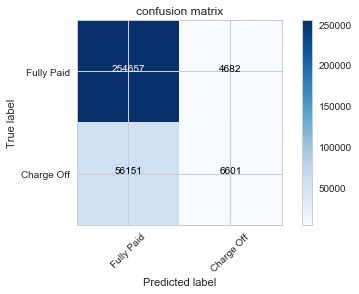

In [69]:
cnf=confusion_matrix(y_test,y_pred)
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [73]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.82      0.98      0.89    259339
  Charge Off       0.59      0.11      0.18     62752

    accuracy                           0.81    322091
   macro avg       0.70      0.54      0.54    322091
weighted avg       0.77      0.81      0.75    322091



In [55]:
feature_importance=pd.DataFrame()
feature_importance['importance']=model.get_feature_importance()
feature_importance['feature'] = x_train.columns
feature_importance

,importance,feature
0,5.19898,loan_amnt
1,4.36843,term
2,18.40884,int_rate
3,1.84259,emp_length
4,1.52826,home_ownership
5,4.06146,annual_inc
6,1.51310,purpose
7,3.61565,dti
8,0.76203,delinq_2yrs
9,0.76106,inq_last_6mths


In [54]:
feature_importance.to_csv('im.csv')

In [74]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [76]:
#Light GBM
start_time = time.time()
gbm = lgb.LGBMRegressor(objective='regression')
gbm.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
end_time = (time.time() - start_time)
print("Acuuracy: ", acc)
print("Running Time: %s" % datetime.timedelta(seconds=end_time))

Acuuracy:  0.805173072206302
Running Time: 0:01:03.364077


混淆矩陣:  [[259339      0]
 [ 62752      0]]
Confusion matrix, without normalization
[[259339      0]
 [ 62752      0]]


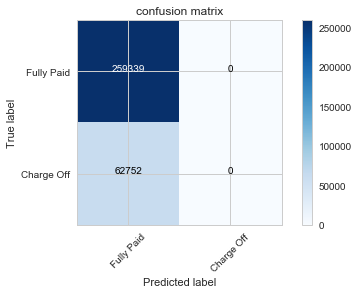

In [77]:
cnf=confusion_matrix(y_test,y_pred)
print('混淆矩陣: ',cnf)
target_name=['Fully Paid','Charge Off'] 
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [78]:
print(classification_report(y_test, y_pred, target_names=['Fully Paid','Charge Off']))

              precision    recall  f1-score   support

  Fully Paid       0.81      1.00      0.89    259339
  Charge Off       0.00      0.00      0.00     62752

    accuracy                           0.81    322091
   macro avg       0.40      0.50      0.45    322091
weighted avg       0.65      0.81      0.72    322091

